# Import Libraries

In [18]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from numpy import std
from statistics import mean

 


# Columns in Drug data

In [19]:
names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

# Load Drug Consumption data

In [20]:
data = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign1/drug_consumption.data', header = None, names = names)
data

ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...    ...      ...      ...        ...      ...        ...          ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  ...  Ecstasy  Heroin  Ketamine  \
0         -0.57545  -0.58331       -0.91699  ...      CL0     CL0       CL0   
1          1.93886   1.43533        0.76096  ...      CL4     CL0       CL2   
2          0.80523  -0.84732       -1.62090  ...      CL0     CL0       CL0   
3         -0.80615  -0.01928        0.59042  ...      CL0     CL0       CL2   
4         -1.63340  -0.45174       -0.30172  ...      CL1     CL0       CL0   
...            ...       ...            ...  ...      ...     ...       ...   
1880       1.74091   1.88511        0.76096  ...      CL0     CL0       CL0   
1881       1.74091   0.58331        0.76096  ...      CL2     CL0       CL0   
1882      -1.37639  -1.27553       -1.77200  ...      CL4     CL0       CL2   
1883      -1.92173   0.29338       -1.62090  ...      CL3     CL0       CL0   
1884       2.12700   1.65653        1.11406  ...      CL3     CL0       CL0   

     Legal_highs  LSD Methadone Mushrooms Nicotine Semeron  VSA  
0            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
1            CL0  CL2       CL3       CL0      CL4     CL0  CL0  
2            CL0  CL0       CL0       CL1      CL0     CL0  CL0  
3            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
4            CL1  CL0       CL0       CL2      CL2     CL0  CL0  
...          ...  ...       ...       ...      ...     ...  ...  
1880         CL3  CL3       CL0       CL0      CL0     CL0  CL5  
1881         CL3  CL5       CL4       CL4      CL5     CL0  CL0  
1882         CL0  CL2       CL0       CL2      CL6     CL0  CL0  
1883         CL3  CL3       CL0       CL3      CL4     CL0  CL0  
1884         CL3  CL3       CL0       CL3      CL6     CL0  CL2  

[1885 rows x 32 columns]

In [21]:
data.head()


ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   

   Extraversion  Openness  Agreeableness  ...  Ecstasy  Heroin  Ketamine  \
0      -0.57545  -0.58331       -0.91699  ...      CL0     CL0       CL0   
1       1.93886   1.43533        0.76096  ...      CL4     CL0       CL2   
2       0.80523  -0.84732       -1.62090  ...      CL0     CL0       CL0   
3      -0.80615  -0.01928        0.59042  ...      CL0     CL0       CL2   
4      -1.63340  -0.45174       -0.30172  ...      CL1     CL0       CL0   

  Legal_highs  LSD Methadone Mushrooms Nicotine Semeron  VSA  
0         CL0  CL0       CL0       CL0      CL2     CL0  CL0  
1         CL0  CL2       CL3       CL0      CL4     CL0  CL0  
2         CL0  CL0       CL0       CL1      CL0     CL0  CL0  
3         CL0  CL0       CL0       CL0      CL2     CL0  CL0  
4         CL1  CL0       CL0       CL2      CL2     CL0  CL0  

[5 rows x 32 columns]

In [22]:
data_columns = data.columns

print(data_columns)

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol',
       'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis',
       'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron',
       'VSA'],
      dtype='object')


In [23]:
print(data.isna().sum())

ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Alcohol              0
Amphetamine          0
Amyl_nitrite         0
Benzodiazepine       0
Caffeine             0
Cannabis             0
Chocolate            0
Cocaine              0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Methadone            0
Mushrooms            0
Nicotine             0
Semeron              0
VSA                  0
dtype: int64


In [24]:
data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'ID': 1885,
 'Age': 6,
 'Gender': 2,
 'Education': 9,
 'Country': 7,
 'Ethnicity': 7,
 'Neuroticism': 49,
 'Extraversion': 42,
 'Openness': 35,
 'Agreeableness': 41,
 'Conscientiousness': 41,
 'Impulsiveness': 10,
 'Sensation_seeking': 11,
 'Alcohol': 7,
 'Amphetamine': 7,
 'Amyl_nitrite': 7,
 'Benzodiazepine': 7,
 'Caffeine': 7,
 'Cannabis': 7,
 'Chocolate': 7,
 'Cocaine': 7,
 'Crack': 7,
 'Ecstasy': 7,
 'Heroin': 7,
 'Ketamine': 7,
 'Legal_highs': 7,
 'LSD': 7,
 'Methadone': 7,
 'Mushrooms': 7,
 'Nicotine': 7,
 'Semeron': 5,
 'VSA': 7}

In [25]:
data.describe()

ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity  Neuroticism  Extraversion     Openness  Agreeableness  \
count  1885.000000  1885.000000   1885.000000  1885.000000    1885.000000   
mean     -0.309577     0.000047     -0.000163    -0.000534      -0.000245   
std       0.166226     0.998106      0.997448     0.996229       0.997440   
min      -1.107020    -3.464360     -3.273930    -3.273930      -3.464360   
25%      -0.316850    -0.678250     -0.695090    -0.717270      -0.606330   
50%      -0.316850     0.042570      0.003320    -0.019280      -0.017290   
75%      -0.316850     0.629670      0.637790     0.723300       0.760960   
max       1.907250     3.273930      3.273930     2.901610       3.464360   

       Conscientiousness  Impulsiveness  Sensation_seeking  
count        1885.000000    1885.000000        1885.000000  
mean           -0.000386       0.007216          -0.003292  
std             0.997523       0.954435           0.963701  
min            -3.464360      -2.555240          -2.078480  
25%            -0.652530      -0.711260          -0.525930  
50%            -0.006650      -0.217120           0.079870  
75%             0.584890       0.529750           0.765400  
max             3.464360       2.901610           1.921730

In [26]:
data

ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...    ...      ...      ...        ...      ...        ...          ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  ...  Ecstasy  Heroin  Ketamine  \
0         -0.57545  -0.58331       -0.91699  ...      CL0     CL0       CL0   
1          1.93886   1.43533        0.76096  ...      CL4     CL0       CL2   
2          0.80523  -0.84732       -1.62090  ...      CL0     CL0       CL0   
3         -0.80615  -0.01928        0.59042  ...      CL0     CL0       CL2   
4         -1.63340  -0.45174       -0.30172  ...      CL1     CL0       CL0   
...            ...       ...            ...  ...      ...     ...       ...   
1880       1.74091   1.88511        0.76096  ...      CL0     CL0       CL0   
1881       1.74091   0.58331        0.76096  ...      CL2     CL0       CL0   
1882      -1.37639  -1.27553       -1.77200  ...      CL4     CL0       CL2   
1883      -1.92173   0.29338       -1.62090  ...      CL3     CL0       CL0   
1884       2.12700   1.65653        1.11406  ...      CL3     CL0       CL0   

     Legal_highs  LSD Methadone Mushrooms Nicotine Semeron  VSA  
0            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
1            CL0  CL2       CL3       CL0      CL4     CL0  CL0  
2            CL0  CL0       CL0       CL1      CL0     CL0  CL0  
3            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
4            CL1  CL0       CL0       CL2      CL2     CL0  CL0  
...          ...  ...       ...       ...      ...     ...  ...  
1880         CL3  CL3       CL0       CL0      CL0     CL0  CL5  
1881         CL3  CL5       CL4       CL4      CL5     CL0  CL0  
1882         CL0  CL2       CL0       CL2      CL6     CL0  CL0  
1883         CL3  CL3       CL0       CL3      CL4     CL0  CL0  
1884         CL3  CL3       CL0       CL3      CL6     CL0  CL2  

[1885 rows x 32 columns]

In [27]:
data.set_index('ID', inplace = True)

In [28]:
def change(a):
    
    if ((a == 'CL2') or (a == 'CL3') or (a == 'CL6') or (a == 'CL5') or (a == 'CL4')):
        a = 1
    
    elif ((a == 'CL0') or (a == 'CL1') ):
        a = 0
    
    return a

In [29]:
def changeBin(a):
    
    if (a>=2):
        a = 1
    
    elif ((a == '0') or (a == '1') ):
        a = 0
    
    return a

In [30]:
input_data = data.iloc[ :, :12]
input_data

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                   
1     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                              
1         -0.57545  -0.58331       -0.91699           -0.00665       -0.21712   
2          1.93886   1.43533        0.76096           -0.14277       -0.71126   
3          0.80523  -0.84732       -1.62090           -1.01450       -1.37983   
4         -0.80615  -0.01928        0.59042            0.58489       -1.37983   
5         -1.63340  -0.45174       -0.30172            1.30612       -0.21712   
...            ...       ...            ...                ...            ...   
1884       1.74091   1.88511        0.76096           -1.13788        0.88113   
1885       1.74091   0.58331        0.76096           -1.51840        0.88113   
1886      -1.37639  -1.27553       -1.77200           -1.38502        0.52975   
1887      -1.92173   0.29338       -1.62090           -2.57309        1.29221   
1888       2.12700   1.65653        1.11406            0.41594        0.88113   

      Sensation_seeking  
ID                       
1              -1.18084  
2              -0.21575  
3               0.40148  
4              -1.18084  
5              -0.21575  
...                 ...  
1884            1.92173  
1885            0.76540  
1886           -0.52593  
1887            1.22470  
1888            1.22470  

[1885 rows x 12 columns]

<AxesSubplot:>

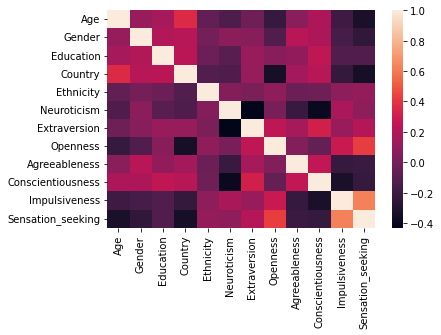

In [31]:
import seaborn as sns
sns.heatmap(data.corr())


# Encoding Labels for Cannabis

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
input_data['Cannabis']= labelencoder.fit_transform(data['Cannabis'])
input_data


Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                   
1     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                              
1         -0.57545  -0.58331       -0.91699           -0.00665       -0.21712   
2          1.93886   1.43533        0.76096           -0.14277       -0.71126   
3          0.80523  -0.84732       -1.62090           -1.01450       -1.37983   
4         -0.80615  -0.01928        0.59042            0.58489       -1.37983   
5         -1.63340  -0.45174       -0.30172            1.30612       -0.21712   
...            ...       ...            ...                ...            ...   
1884       1.74091   1.88511        0.76096           -1.13788        0.88113   
1885       1.74091   0.58331        0.76096           -1.51840        0.88113   
1886      -1.37639  -1.27553       -1.77200           -1.38502        0.52975   
1887      -1.92173   0.29338       -1.62090           -2.57309        1.29221   
1888       2.12700   1.65653        1.11406            0.41594        0.88113   

      Sensation_seeking  Cannabis  
ID                                 
1              -1.18084         0  
2              -0.21575         4  
3               0.40148         3  
4              -1.18084         2  
5              -0.21575         3  
...                 ...       ...  
1884            1.92173         5  
1885            0.76540         3  
1886           -0.52593         6  
1887            1.22470         6  
1888            1.22470         3  

[1885 rows x 13 columns]

In [33]:
data_nunique_dict = input_data.nunique().to_dict()
data_nunique_dict

{'Age': 6,
 'Gender': 2,
 'Education': 9,
 'Country': 7,
 'Ethnicity': 7,
 'Neuroticism': 49,
 'Extraversion': 42,
 'Openness': 35,
 'Agreeableness': 41,
 'Conscientiousness': 41,
 'Impulsiveness': 10,
 'Sensation_seeking': 11,
 'Cannabis': 7}

In [34]:
training_data= input_data.iloc[ :, :12]
training_data

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                   
1     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                              
1         -0.57545  -0.58331       -0.91699           -0.00665       -0.21712   
2          1.93886   1.43533        0.76096           -0.14277       -0.71126   
3          0.80523  -0.84732       -1.62090           -1.01450       -1.37983   
4         -0.80615  -0.01928        0.59042            0.58489       -1.37983   
5         -1.63340  -0.45174       -0.30172            1.30612       -0.21712   
...            ...       ...            ...                ...            ...   
1884       1.74091   1.88511        0.76096           -1.13788        0.88113   
1885       1.74091   0.58331        0.76096           -1.51840        0.88113   
1886      -1.37639  -1.27553       -1.77200           -1.38502        0.52975   
1887      -1.92173   0.29338       -1.62090           -2.57309        1.29221   
1888       2.12700   1.65653        1.11406            0.41594        0.88113   

      Sensation_seeking  
ID                       
1              -1.18084  
2              -0.21575  
3               0.40148  
4              -1.18084  
5              -0.21575  
...                 ...  
1884            1.92173  
1885            0.76540  
1886           -0.52593  
1887            1.22470  
1888            1.22470  

[1885 rows x 12 columns]

# Change the problem to binary

In [35]:
input_data['Cannabis'] = input_data['Cannabis'].map(changeBin)
input_data

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                   
1     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                              
1         -0.57545  -0.58331       -0.91699           -0.00665       -0.21712   
2          1.93886   1.43533        0.76096           -0.14277       -0.71126   
3          0.80523  -0.84732       -1.62090           -1.01450       -1.37983   
4         -0.80615  -0.01928        0.59042            0.58489       -1.37983   
5         -1.63340  -0.45174       -0.30172            1.30612       -0.21712   
...            ...       ...            ...                ...            ...   
1884       1.74091   1.88511        0.76096           -1.13788        0.88113   
1885       1.74091   0.58331        0.76096           -1.51840        0.88113   
1886      -1.37639  -1.27553       -1.77200           -1.38502        0.52975   
1887      -1.92173   0.29338       -1.62090           -2.57309        1.29221   
1888       2.12700   1.65653        1.11406            0.41594        0.88113   

      Sensation_seeking  Cannabis  
ID                                 
1              -1.18084         0  
2              -0.21575         1  
3               0.40148         1  
4              -1.18084         1  
5              -0.21575         1  
...                 ...       ...  
1884            1.92173         1  
1885            0.76540         1  
1886           -0.52593         1  
1887            1.22470         1  
1888            1.22470         1  

[1885 rows x 13 columns]

In [36]:
Cannabis_target_data= input_data['Cannabis']
Cannabis_target_data

ID
1       0
2       1
3       1
4       1
5       1
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: Cannabis, Length: 1885, dtype: int64

# Train-test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data, input_data['Cannabis'], test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 12) (623, 12) (1262,) (623,)


# Apply Min-Max Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


scaled_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)


In [39]:
scaled_x_train

Age  Gender  Education   Country  Ethnicity  Neuroticism  \
0     0.000000     1.0   0.412820  0.000000   0.262143     0.462487   
1     0.782830     0.0   0.273376  1.000000   0.262143     0.520448   
2     0.577496     0.0   0.537681  1.000000   0.200679     0.492045   
3     0.246475     1.0   0.653938  1.000000   0.262143     0.697353   
4     0.000000     0.0   0.273376  0.186098   0.262143     0.636657   
...        ...     ...        ...       ...        ...          ...   
1257  0.000000     0.0   0.412820  0.186098   0.262143     0.357847   
1258  0.409137     1.0   0.537681  1.000000   0.262143     0.413474   
1259  0.000000     0.0   0.814329  1.000000   0.262143     0.300564   
1260  0.000000     1.0   0.814329  1.000000   0.262143     0.492045   
1261  0.409137     0.0   0.412820  1.000000   0.262143     0.520448   

      Extraversion  Openness  Agreeableness  Conscientiousness  Impulsiveness  \
0         0.333217  0.395096       0.729685           0.370263       0.337920   
1         0.376883  0.326880       0.593499           0.537457       0.215401   
2         0.500507  0.395096       0.428229           0.318476       0.215401   
3         0.572721  0.745487       0.545581           0.635594       0.503573   
4         0.670141  0.783882       0.703668           0.537457       0.629735   
...            ...       ...            ...                ...            ...   
1257      0.597404  0.547270       0.593499           0.387201       0.809491   
1258      0.572721  0.395096       0.593499           0.479394       0.428474   
1259      0.892967  0.573735       0.379494           0.584415       0.629735   
1260      0.376883  0.492999       0.593499           0.584415       0.215401   
1261      0.476348  0.621894       0.520802           0.441431       0.428474   

      Sensation_seeking  
0              0.132468  
1              0.224398  
2              0.132468  
3              0.308011  
4              0.825752  
...                 ...  
1257           0.619957  
1258           0.619957  
1259           1.000000  
1260           0.224398  
1261           0.465658  

[1262 rows x 12 columns]

In [40]:
scaled_x_test

Age  Gender  Education  Country  Ethnicity  Neuroticism  \
0    0.246475     0.0   0.814329      0.0   0.262143     0.396666   
1    0.000000     0.0   0.225940      0.0   0.262143     0.623275   
2    0.577496     0.0   0.653938      1.0   0.262143     0.547363   
3    0.000000     1.0   0.653938      1.0   0.262143     0.534323   
4    0.000000     0.0   0.412820      0.0   0.405213     0.377443   
..        ...     ...        ...      ...        ...          ...   
618  0.246475     1.0   0.653938      1.0   0.262143     0.492045   
619  0.246475     1.0   0.653938      1.0   0.262143     0.534323   
620  0.000000     1.0   0.412820      1.0   0.262143     0.735489   
621  0.000000     1.0   0.225940      0.0   0.262143     0.300564   
622  0.000000     1.0   0.412820      0.0   0.262143     0.649318   

     Extraversion  Openness  Agreeableness  Conscientiousness  Impulsiveness  \
0        0.670141  0.465485       0.520802           0.560031       0.428474   
1        0.311882  0.597595       0.403981           0.441431       0.565343   
2        0.333217  0.371843       0.452219           0.405822       0.503573   
3        0.597404  0.492999       0.148686           0.735380       0.503573   
4        0.696415  0.417933       0.403981           0.499040       0.629735   
..            ...       ...            ...                ...            ...   
618      0.454133  0.349269       0.452219           0.710993       0.337920   
619      0.670141  0.520894       0.475475           0.584415       0.629735   
620      0.269702 -0.071936       0.620506           0.370263       0.215401   
621      0.796106  0.573735       0.520802           0.537457       0.629735   
622      0.454133  0.492999       0.497262           0.441431       0.428474   

     Sensation_seeking  
0             0.539559  
1             0.619957  
2             0.308011  
3             0.619957  
4             0.825752  
..                 ...  
618           0.465658  
619           0.619957  
620           0.132468  
621           1.000000  
622           0.465658  

[623 rows x 12 columns]

# Feature Selection 

In [41]:
from sklearn.feature_selection import chi2
import pandas as pd

In [42]:
chi_scores = chi2(scaled_x_train,Y_train)

In [43]:
chi_scores

(array([18.07433825, 39.35488476,  1.61424116, 60.57659197,  0.21256349,
         0.70356678,  0.20088843,  6.55211027,  1.62693993,  3.40775394,
         4.80681484, 16.83262249]),
 array([2.12445470e-05, 3.53367764e-10, 2.03896649e-01, 7.07705789e-15,
        6.44765541e-01, 4.01587795e-01, 6.54004684e-01, 1.04759837e-02,
        2.02126822e-01, 6.48907135e-02, 2.83473943e-02, 4.08254358e-05]))

In [44]:
p_val = pd.Series(chi_scores[1])
p_val.index = scaled_x_train.columns
p_val

Age                  2.124455e-05
Gender               3.533678e-10
Education            2.038966e-01
Country              7.077058e-15
Ethnicity            6.447655e-01
Neuroticism          4.015878e-01
Extraversion         6.540047e-01
Openness             1.047598e-02
Agreeableness        2.021268e-01
Conscientiousness    6.489071e-02
Impulsiveness        2.834739e-02
Sensation_seeking    4.082544e-05
dtype: float64

In [45]:
p_val=p_val.sort_values(ascending=False)

In [46]:
p_val

Extraversion         6.540047e-01
Ethnicity            6.447655e-01
Neuroticism          4.015878e-01
Education            2.038966e-01
Agreeableness        2.021268e-01
Conscientiousness    6.489071e-02
Impulsiveness        2.834739e-02
Openness             1.047598e-02
Sensation_seeking    4.082544e-05
Age                  2.124455e-05
Gender               3.533678e-10
Country              7.077058e-15
dtype: float64

<AxesSubplot:>

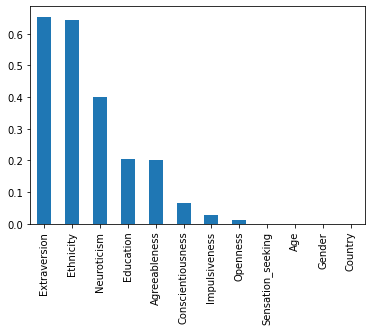

In [47]:
p_val.plot.bar()


# Dataset D 

In [48]:
Cannabis_train_data = scaled_x_train[['Extraversion','Neuroticism','Ethnicity','Agreeableness','Conscientiousness','Education']]

In [49]:
Cannabis_test_data = scaled_x_test[['Extraversion','Neuroticism','Ethnicity','Agreeableness','Conscientiousness','Education' ]]

In [50]:
from collections import Counter
print(Counter(input_data['Cannabis']))

Counter({1: 1472, 0: 413})


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_training_data = pd.DataFrame(
    scaler.fit_transform(training_data),
    columns = training_data.columns
)


In [52]:
Dataset_D = scaled_training_data[['Extraversion','Neuroticism','Ethnicity','Agreeableness','Conscientiousness','Education']]

In [53]:
Dataset_D

Extraversion  Neuroticism  Ethnicity  Agreeableness  Conscientiousness  \
0         0.412116     0.560562   0.409061       0.367654           0.499040   
1         0.796106     0.413474   0.262143       0.609827           0.479394   
2         0.622976     0.444788   0.262143       0.266061           0.353580   
3         0.376883     0.492045   0.262143       0.585213           0.584415   
4         0.250544     0.623275   0.262143       0.456454           0.688508   
...            ...          ...        ...            ...                ...   
1880      0.765875     0.336890   0.262143       0.609827           0.335773   
1881      0.765875     0.477550   0.262143       0.609827           0.280854   
1882      0.289795     0.682246   0.262143       0.244253           0.300104   
1883      0.206510     0.649318   0.262143       0.266061           0.128634   
1884      0.824839     0.444788   0.262143       0.660789           0.560031   

      Education  
0      0.537681  
1      1.000000  
2      0.537681  
3      0.814329  
4      1.000000  
...         ...  
1880   0.412820  
1881   0.412820  
1882   0.653938  
1883   0.412820  
1884   0.412820  

[1885 rows x 6 columns]

# General Function To perform K-Fold

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

def Plot_graph(accuracy,precision,f1_score_measure,recall):
    figure = plt.figure(figsize= (16,8))
    
    figure.tight_layout(pad=5.0)
    folds = [i for i in range(len(accuracy))]
    
    plt.subplot(2, 2, 1)
    plt.plot(folds, accuracy,color='red', marker='o')
    plt.title('accuracy Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(folds, precision,color='red', marker='o')
    plt.title('precision Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('precision', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,3)
    plt.plot(folds, recall,color='red', marker='o')
    plt.title('recall Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('recall', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,4)
    plt.plot(folds, f1_score_measure,color='red', marker='o')
    plt.title('f1_score Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('f1_score', fontsize=14)
    plt.grid(True)
    
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

def get_mean(accuracy,error,precision,f1_score_measure,recall):
    
    print("Mean Accuracy for Random Forest Classifier: ", mean(accuracy))
    print("Mean precision for Random Forest Classifier: ", mean(precision))
    print("Mean recall for Random Forest Classifier: ", mean(recall))
    print("Mean f1_score for Random Forest Classifier: ", mean(f1_score_measure))
    
def K_Fold_With_Dataset(Dataset_D,clf,sampling=None):
    kfold = KFold(n_splits=10, shuffle=False)
    error=[]
    accuracy=[]
    precision=[]
    recall=[]
    f1_score_measure=[]
    for train_index, test_index in kfold.split(Dataset_D):
        xtrain,xtest = Dataset_D.iloc[train_index],Dataset_D.iloc[test_index]
        ytrain,ytest = Cannabis_target_data.iloc[train_index],Cannabis_target_data.iloc[test_index]
        
        rf1 = clf
        if sampling=='Oversample':
            oversample = SMOTE()
            X_DB1, Y_DB1 = oversample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB1, Y_DB1)
            
        elif sampling=='Undersample':
            undersample = EditedNearestNeighbours()
            X_DB2, Y_DB2 = undersample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB2, Y_DB2)
        else:
            rf1=rf1.fit(xtrain, ytrain)
        
        
        RF_predictions = rf1.predict(xtest)
        
        error.append(mean_squared_error(ytest,RF_predictions))
        accuracy.append(accuracy_score(ytest, RF_predictions))
        precision.append(precision_score(ytest, RF_predictions))
        recall.append(recall_score(ytest, RF_predictions))
        f1_score_measure.append(f1_score(ytest, RF_predictions))
        
        
    get_mean(accuracy,error,precision,f1_score_measure,recall)
    Plot_graph(accuracy,precision,f1_score_measure,recall)

# RandomForestClassifier - Without Sampling

e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Mean Accuracy for Random Forest Classifier:  0.7920775638860745
Mean precision for Random Forest Classifier:  0.791959994423922
Mean recall for Random Forest Classifier:  0.9916934086291438
Mean f1_score for Random Forest Classifier:  0.8746297676798076


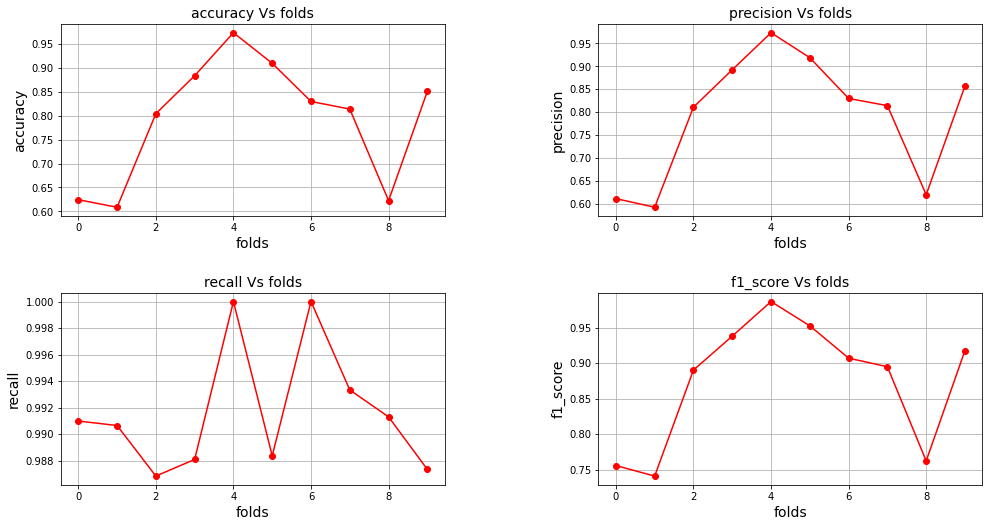

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(Dataset_D,rf1,sampling=None)

# Decision Tree - Without Sampling

Mean Accuracy for Random Forest Classifier:  0.7883626027243048
Mean precision for Random Forest Classifier:  0.7922263192676167
Mean recall for Random Forest Classifier:  0.9818131548324319
Mean f1_score for Random Forest Classifier:  0.8713600818966855


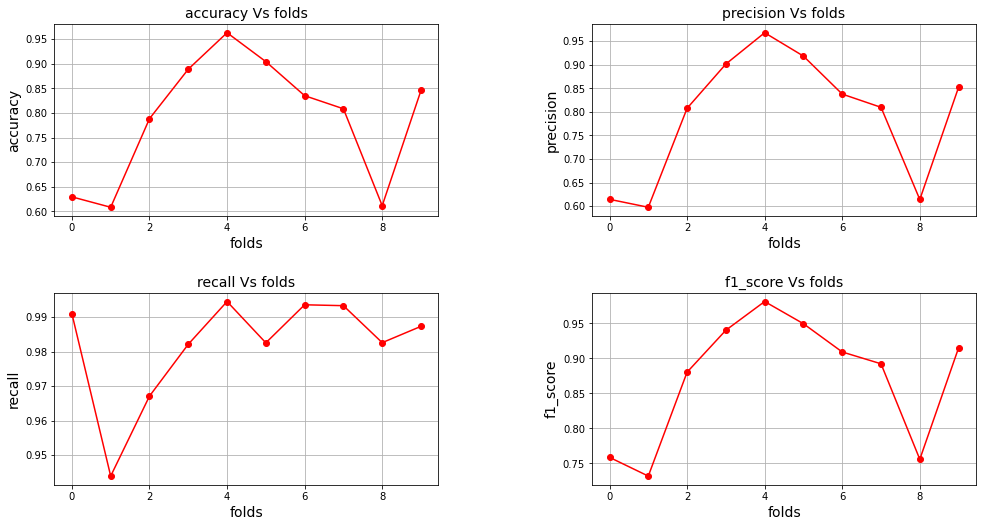

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

rf1 = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0)
K_Fold_With_Dataset(Dataset_D,rf1,sampling=None)

# SVC - Without Sampling

Mean Accuracy for Random Forest Classifier:  0.7809495665878644
Mean precision for Random Forest Classifier:  0.7809495665878644
Mean recall for Random Forest Classifier:  1.0
Mean f1_score for Random Forest Classifier:  0.8701992981993428


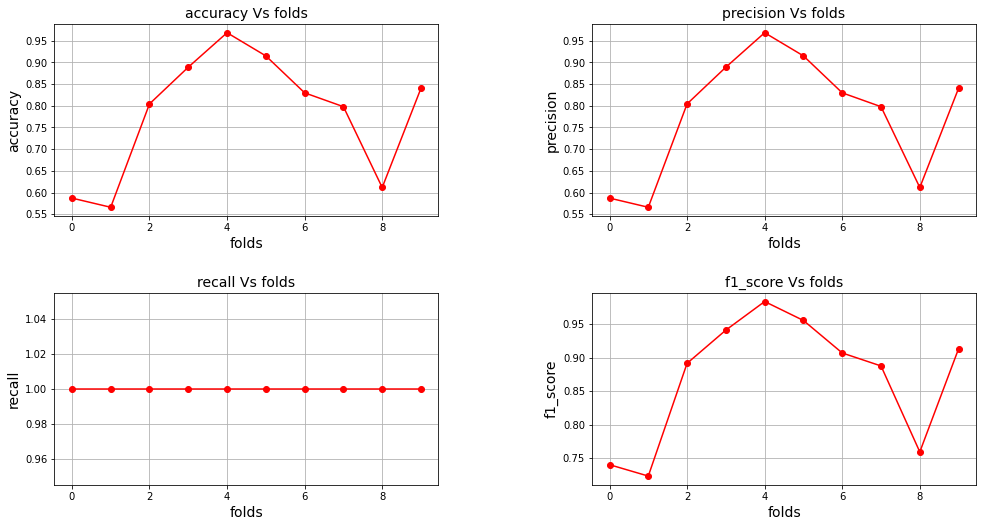

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

rf1 = SVC(kernel='linear',random_state=0)
K_Fold_With_Dataset(Dataset_D,rf1,sampling=None)

#  KNN - Without Sampling

Mean Accuracy for Random Forest Classifier:  0.7708572554317235
Mean precision for Random Forest Classifier:  0.7971968391354637
Mean recall for Random Forest Classifier:  0.9413295303210842
Mean f1_score for Random Forest Classifier:  0.857878095091157


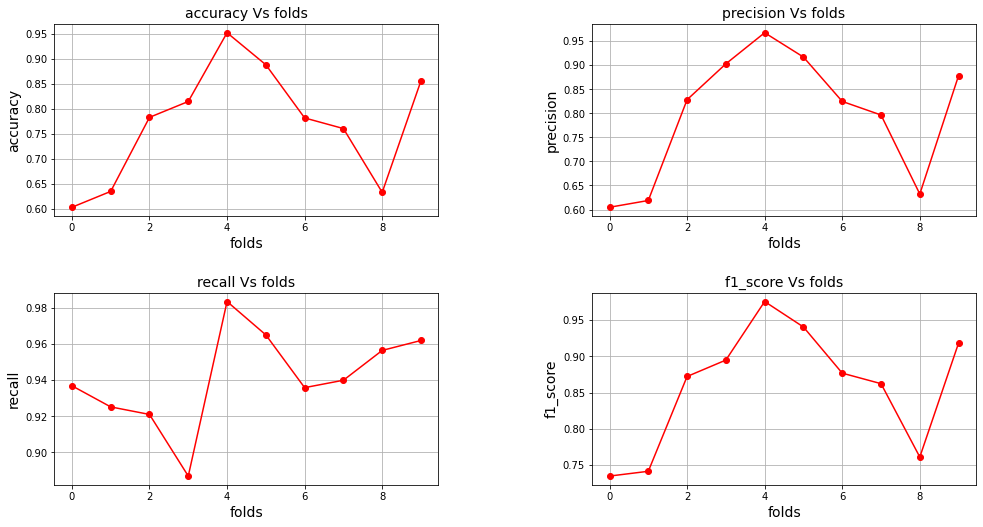

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

rf1 = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')
K_Fold_With_Dataset(Dataset_D,rf1,sampling=None)

#  RandomForestClassifier - Over Sampling

e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Mean Accuracy for Random Forest Classifier:  0.6706743217381516
Mean precision for Random Forest Classifier:  0.854995731975712
Mean recall for Random Forest Classifier:  0.6640550616950696
Mean f1_score for Random Forest Classifier:  0.7447400007928415


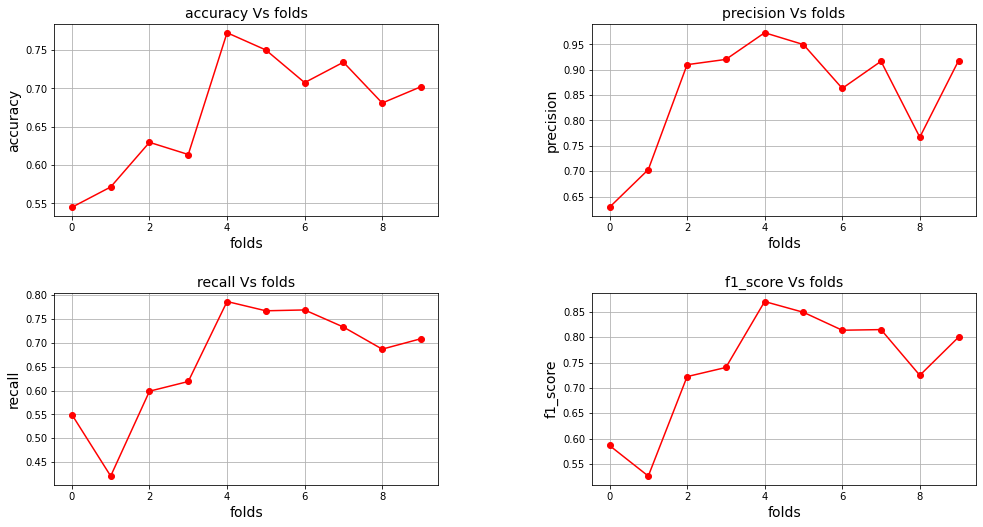

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Oversample")

# Decision Tree - Over Sampling

Mean Accuracy for Random Forest Classifier:  0.5926376224248565
Mean precision for Random Forest Classifier:  0.843853453279659
Mean recall for Random Forest Classifier:  0.5464661617642551
Mean f1_score for Random Forest Classifier:  0.658708906473801


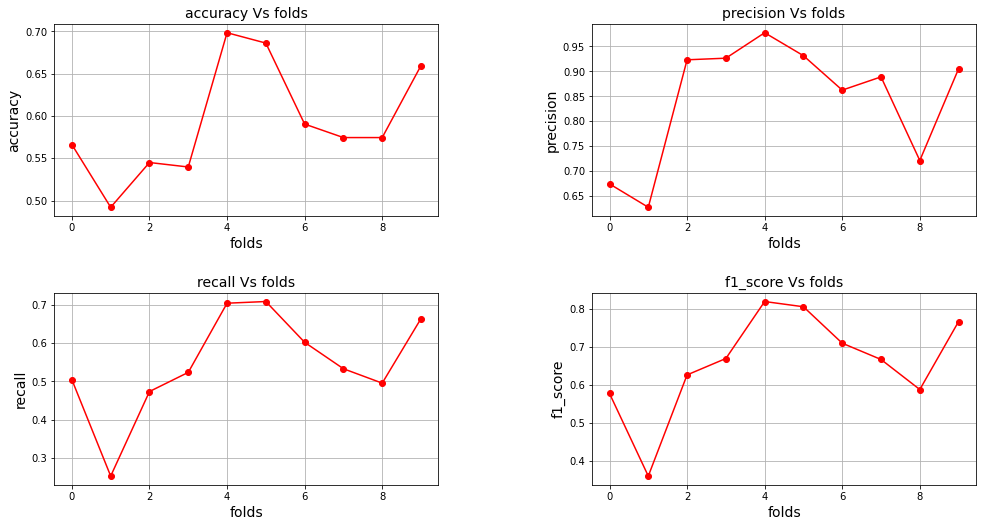

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

rf1 = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0)
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Oversample")

# SVC - Over Sampling

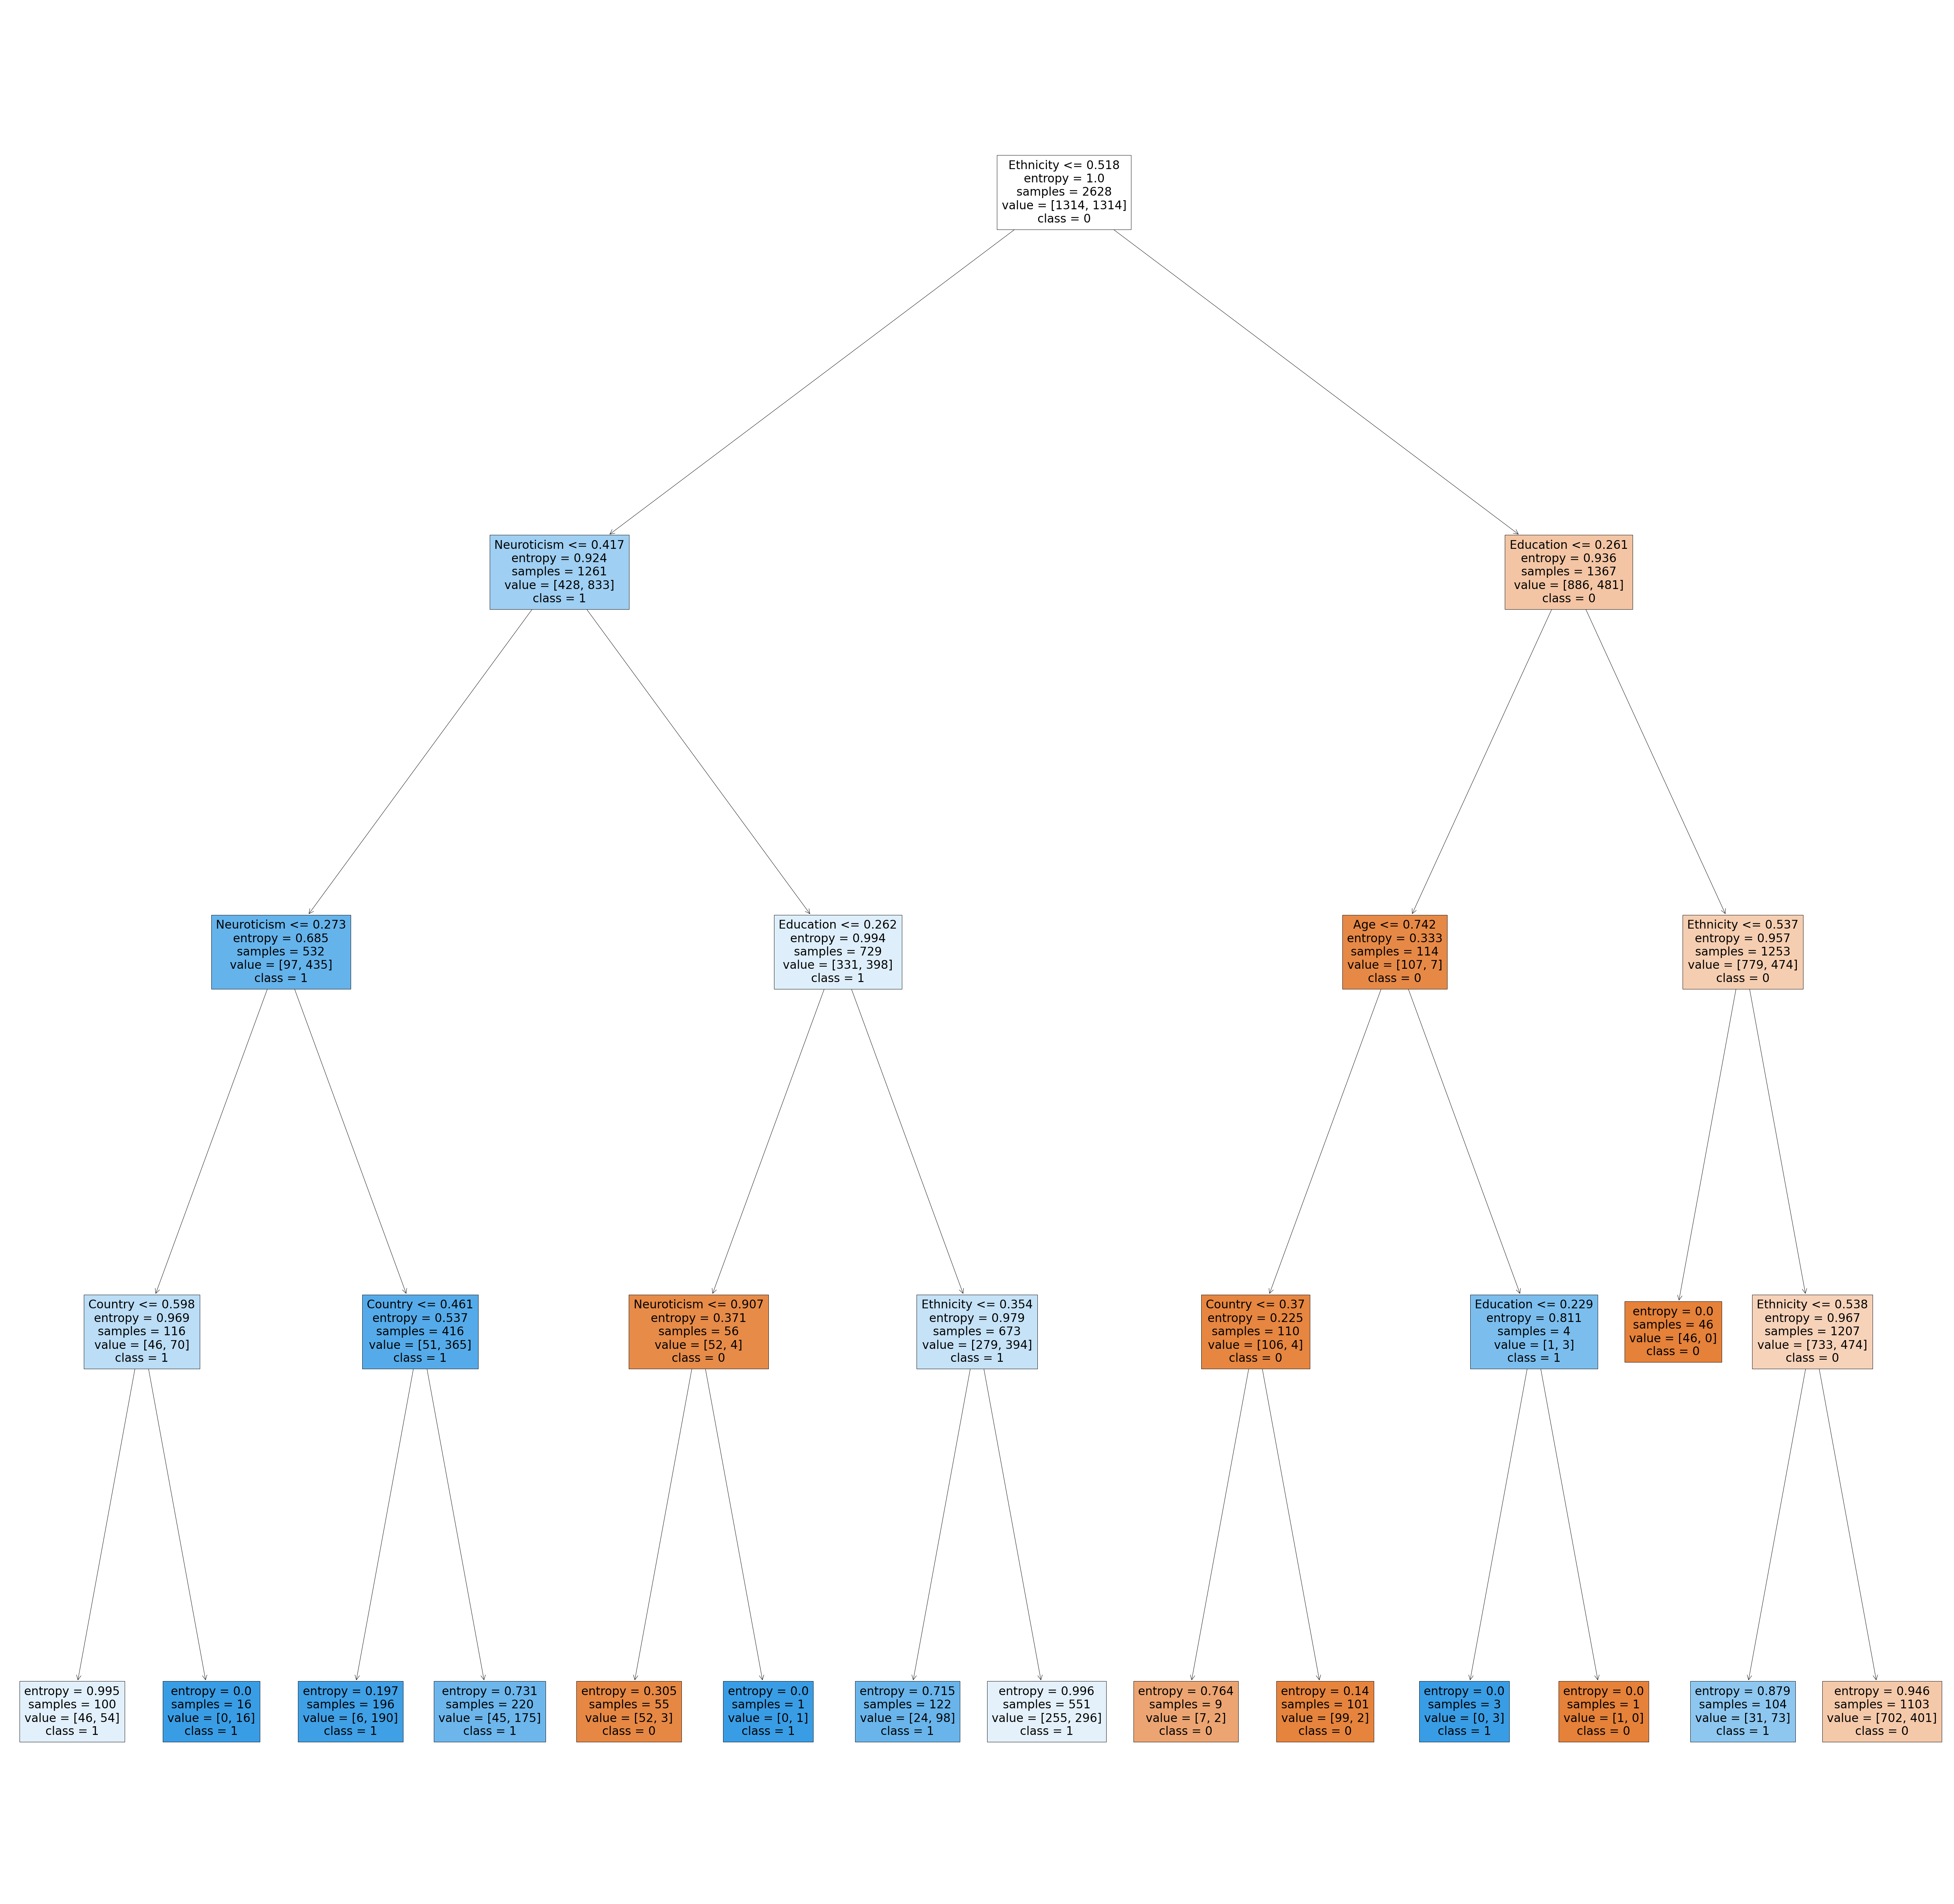

In [61]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(rf1, 
                   feature_names=input_data.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("Canabis_Oversample_DT_decistion_tree.png")

Mean Accuracy for Random Forest Classifier:  0.6107283575368682
Mean precision for Random Forest Classifier:  0.8384965324859643
Mean recall for Random Forest Classifier:  0.5862349674927889
Mean f1_score for Random Forest Classifier:  0.6852286664406965


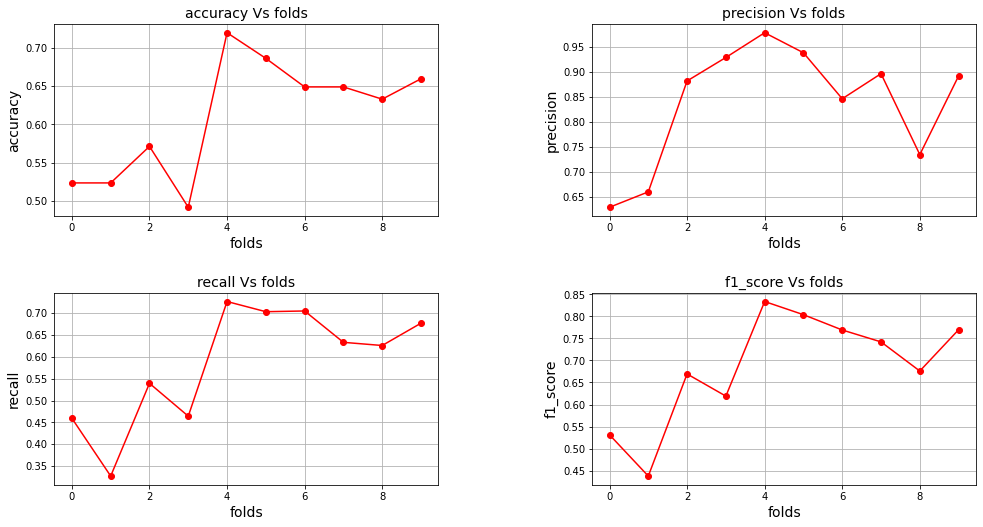

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

rf1 = SVC()
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Oversample")

#   KNN - Over Sampling

Mean Accuracy for Random Forest Classifier:  0.6218225824608803
Mean precision for Random Forest Classifier:  0.8324643263603098
Mean recall for Random Forest Classifier:  0.614380494297118
Mean f1_score for Random Forest Classifier:  0.704436231358167


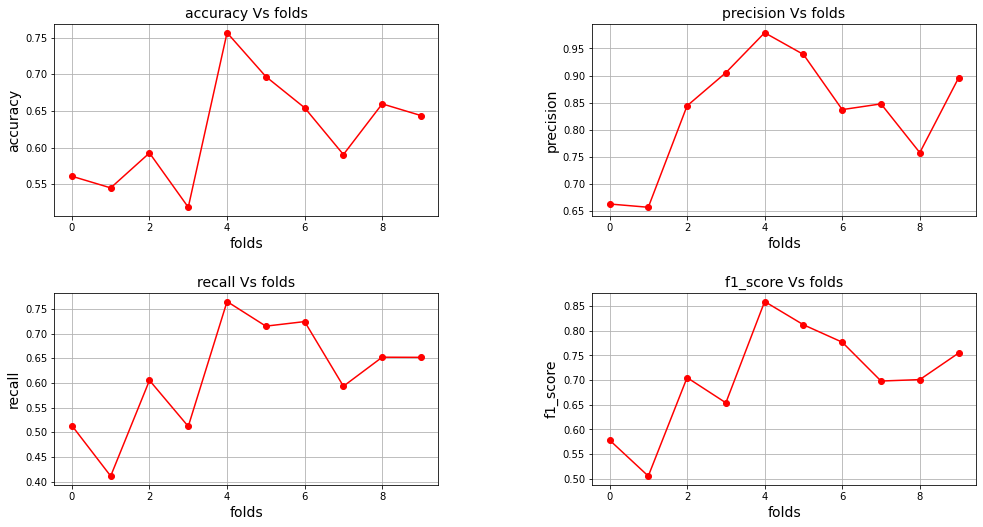

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

rf1 = KNeighborsClassifier(n_neighbors=9)
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Oversample")

#  RandomForestClassifier - Under Sampling

e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Mean Accuracy for Random Forest Classifier:  0.7014156253517956
Mean precision for Random Forest Classifier:  0.8429422714656688
Mean recall for Random Forest Classifier:  0.7401148704789153
Mean f1_score for Random Forest Classifier:  0.7851102500341465


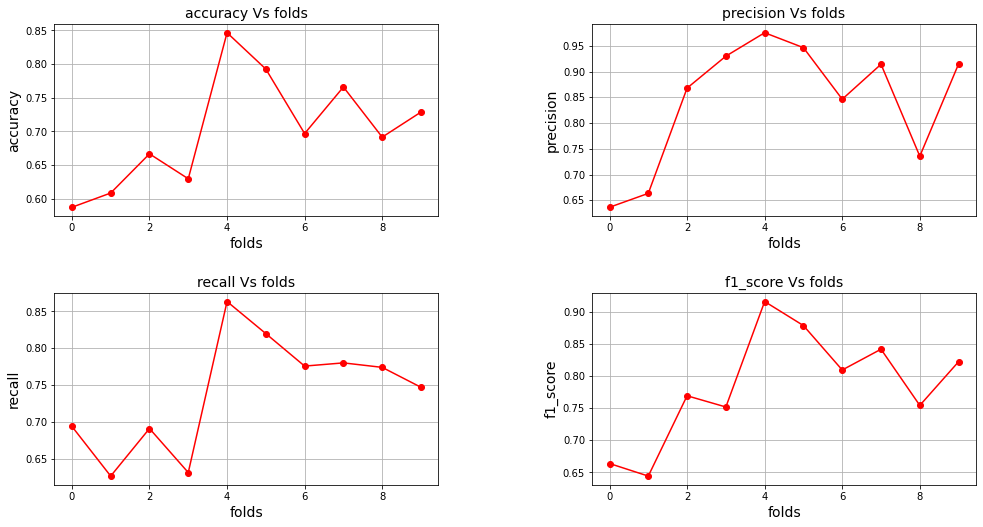

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Undersample")

# Decision Tree - Under Sampling

Mean Accuracy for Random Forest Classifier:  0.680209388720027
Mean precision for Random Forest Classifier:  0.8555520290018226
Mean recall for Random Forest Classifier:  0.6946089882159213
Mean f1_score for Random Forest Classifier:  0.7617844680655448


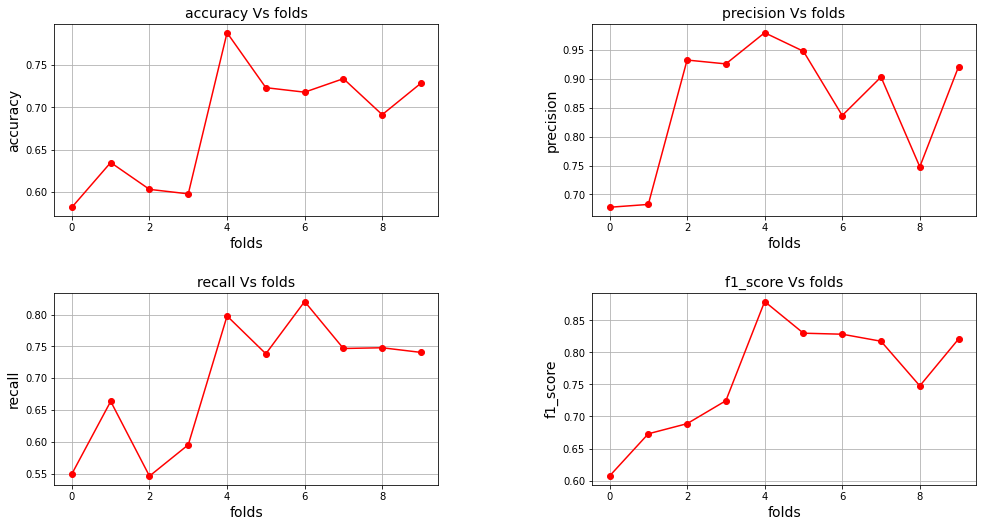

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

rf1 = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0)
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Undersample")

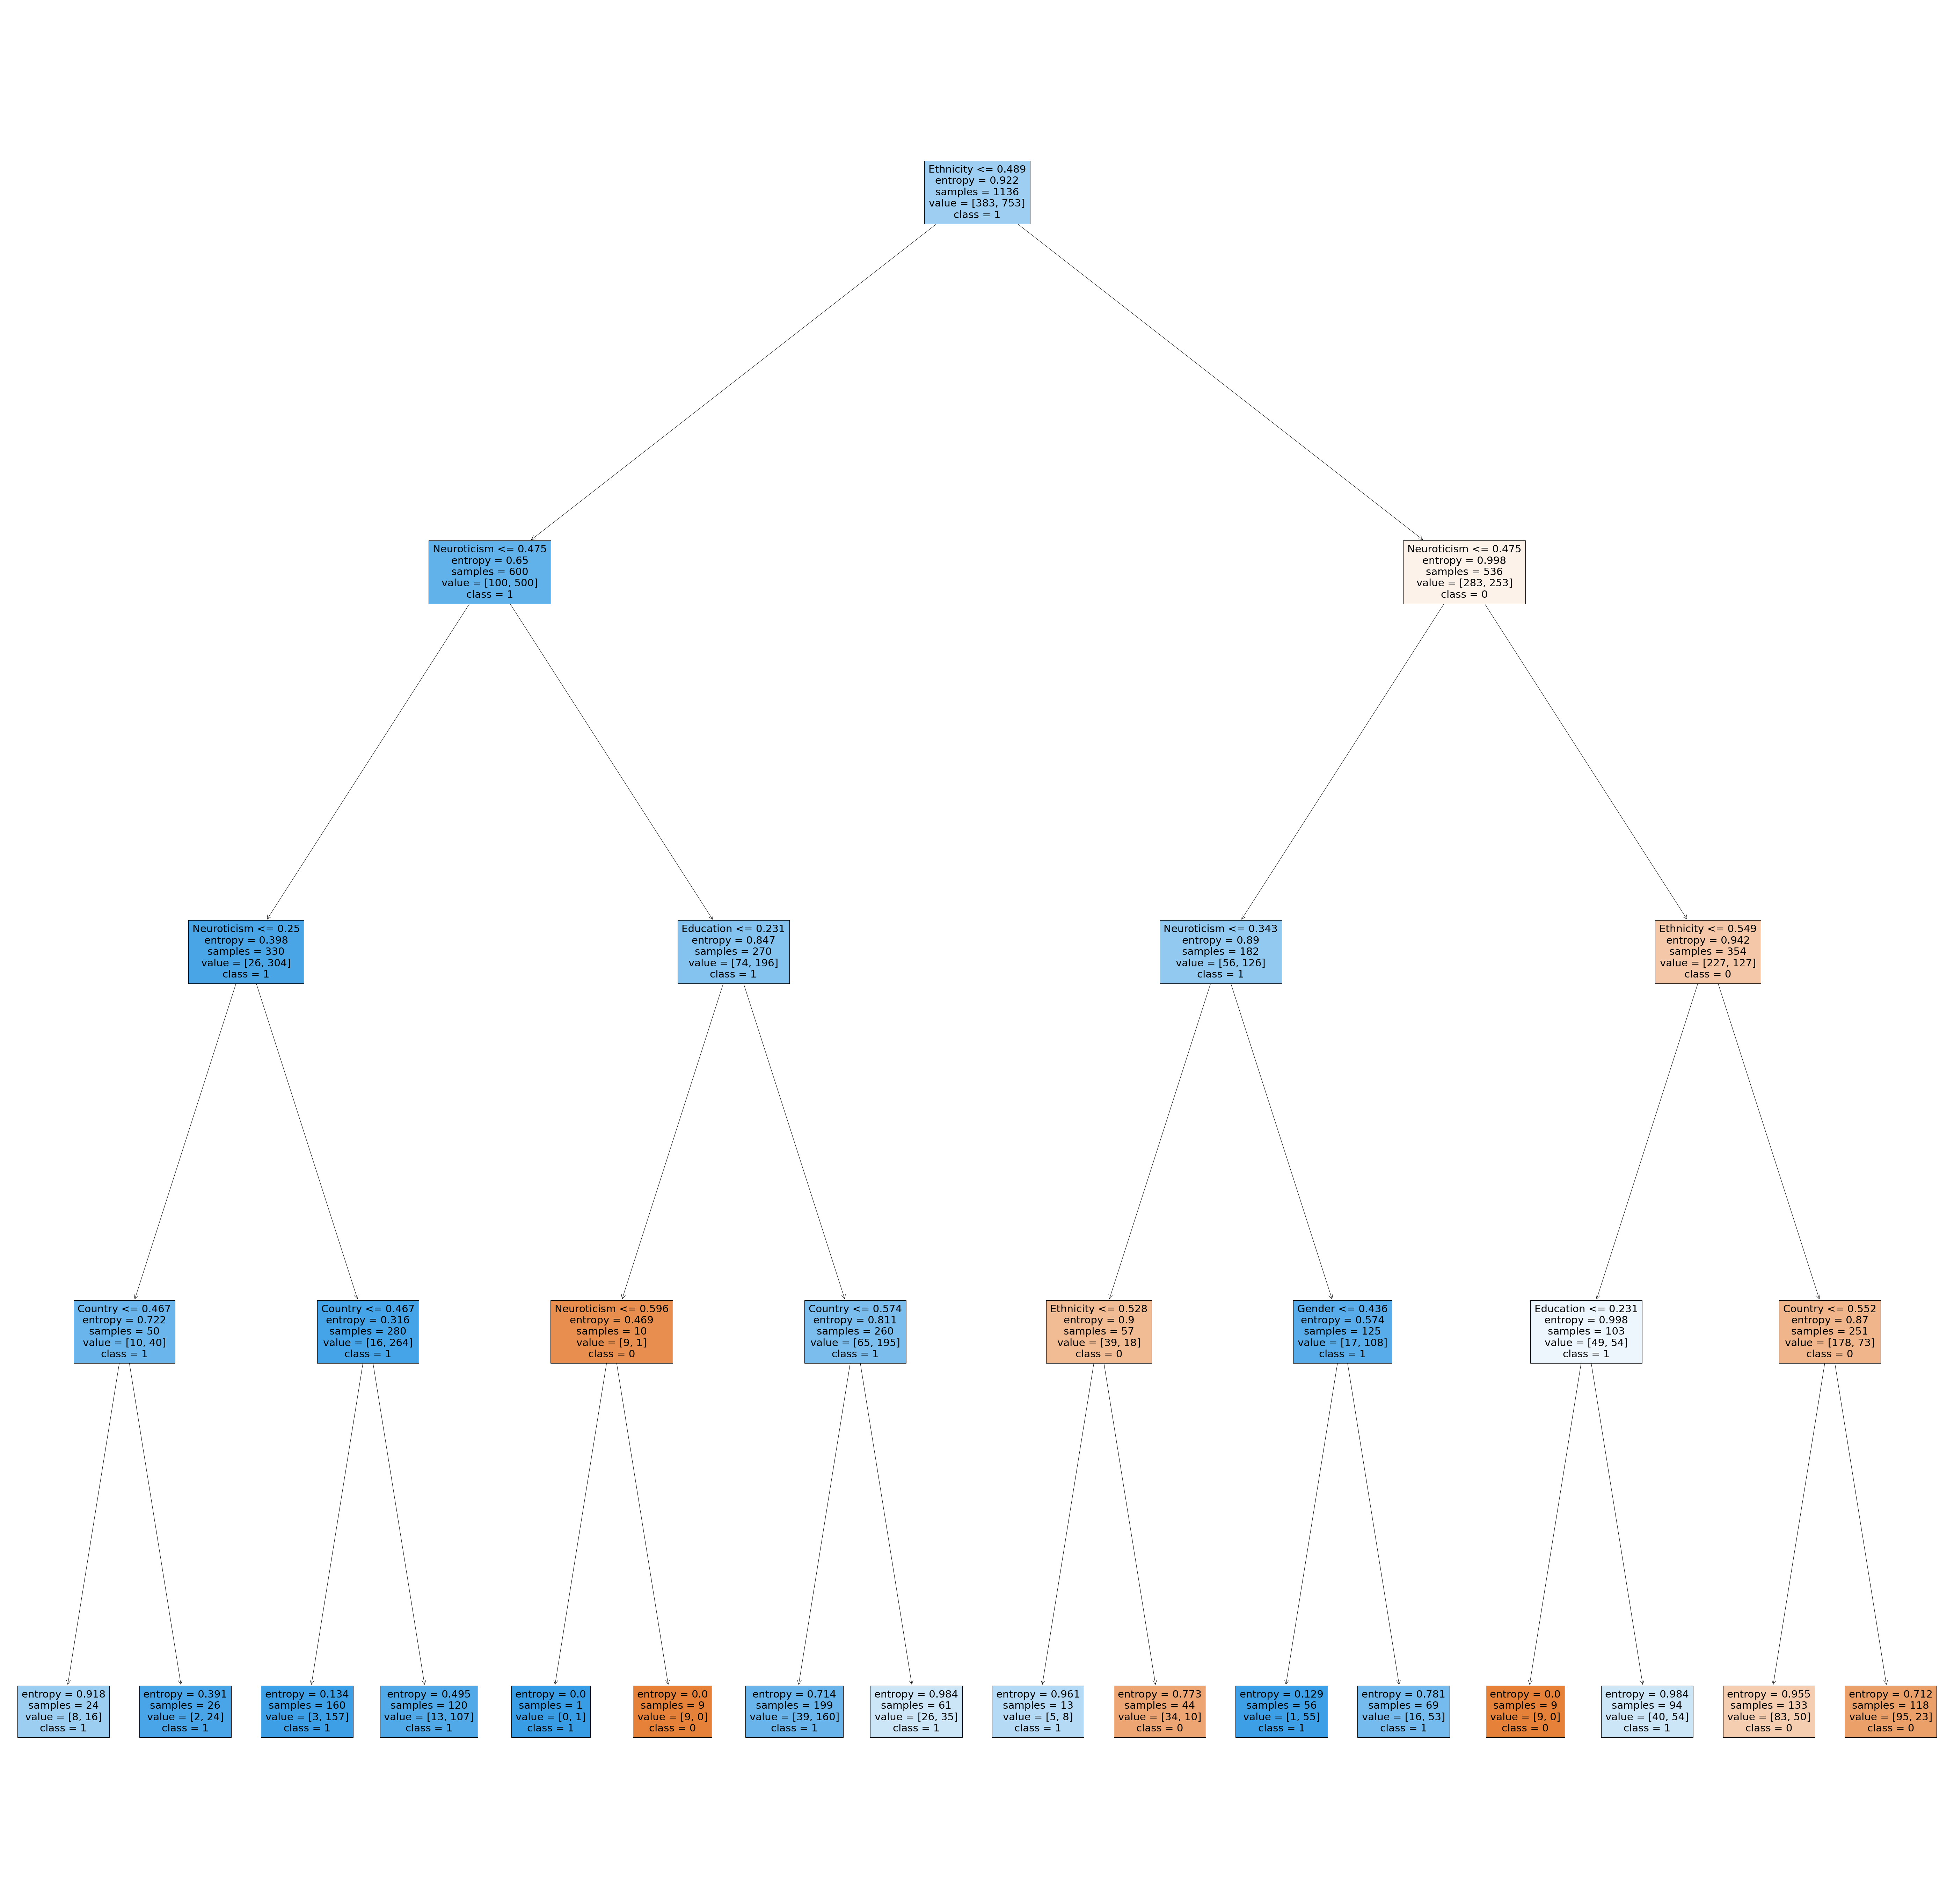

In [58]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(rf1, 
                   feature_names=input_data.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("Canabis_Oversample_DT_decistion_tree.png")

#  SVC - Under Sampling

Mean Accuracy for Random Forest Classifier:  0.699811437577395
Mean precision for Random Forest Classifier:  0.8191040824830584
Mean recall for Random Forest Classifier:  0.7800505286177901
Mean f1_score for Random Forest Classifier:  0.7936666911077092


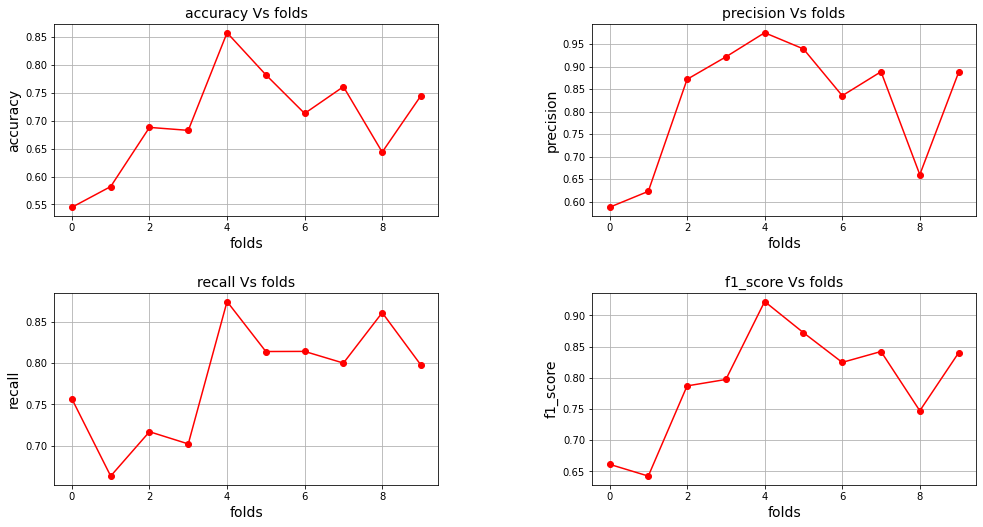

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

rf1 = SVC()
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Undersample")

#  KNN - Under Sampling

Mean Accuracy for Random Forest Classifier:  0.6717100078802206
Mean precision for Random Forest Classifier:  0.8238201434365983
Mean recall for Random Forest Classifier:  0.7218338968737218
Mean f1_score for Random Forest Classifier:  0.7651993256126847


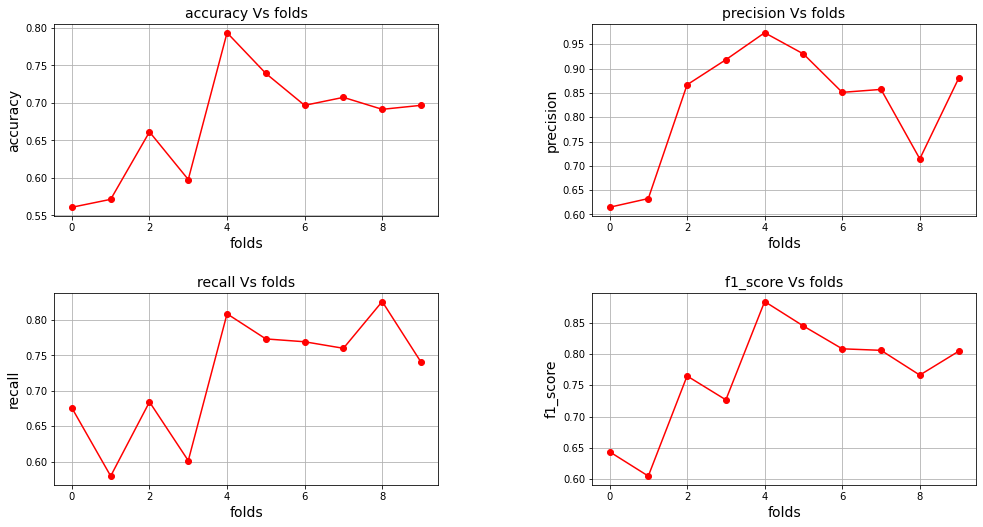

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

rf1 = KNeighborsClassifier(n_neighbors=9)
K_Fold_With_Dataset(Dataset_D,rf1,sampling="Undersample")

# MLP -No sampling

Mean Accuracy for Random Forest Classifier:  0.7703253405381065
Mean precision for Random Forest Classifier:  0.8064507650031376
Mean recall for Random Forest Classifier:  0.9120009868546824
Mean f1_score for Random Forest Classifier:  0.8521506038949256


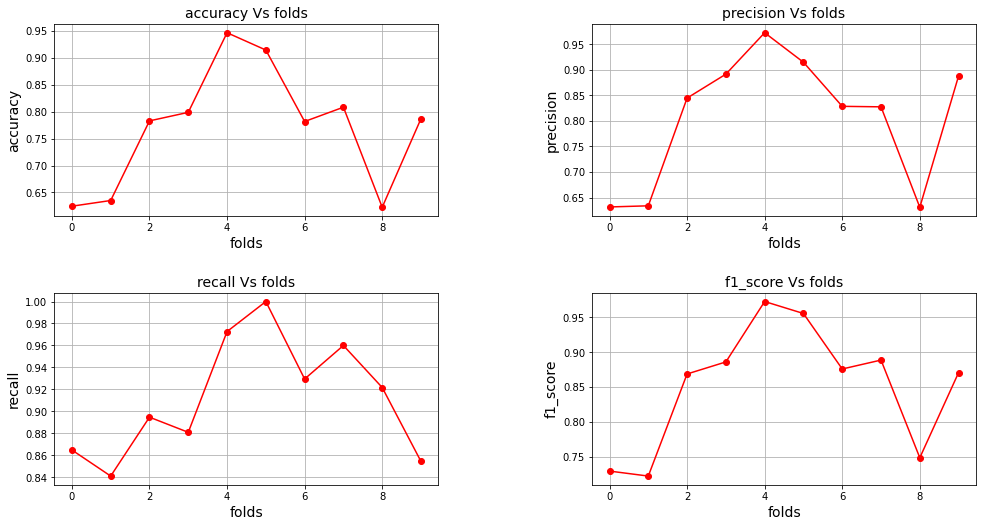

In [50]:
from sklearn.neural_network import MLPClassifier
rf1= MLPClassifier(hidden_layer_sizes=(200,400,50), max_iter=500,activation = 'relu',solver='adam',random_state=20)

K_Fold_With_Dataset(Dataset_D,rf1)

#  GB -No sampling

Mean Accuracy for Random Forest Classifier:  0.780946752223348
Mean precision for Random Forest Classifier:  0.7995396282862353
Mean recall for Random Forest Classifier:  0.9548289018335485
Mean f1_score for Random Forest Classifier:  0.8646436312777078


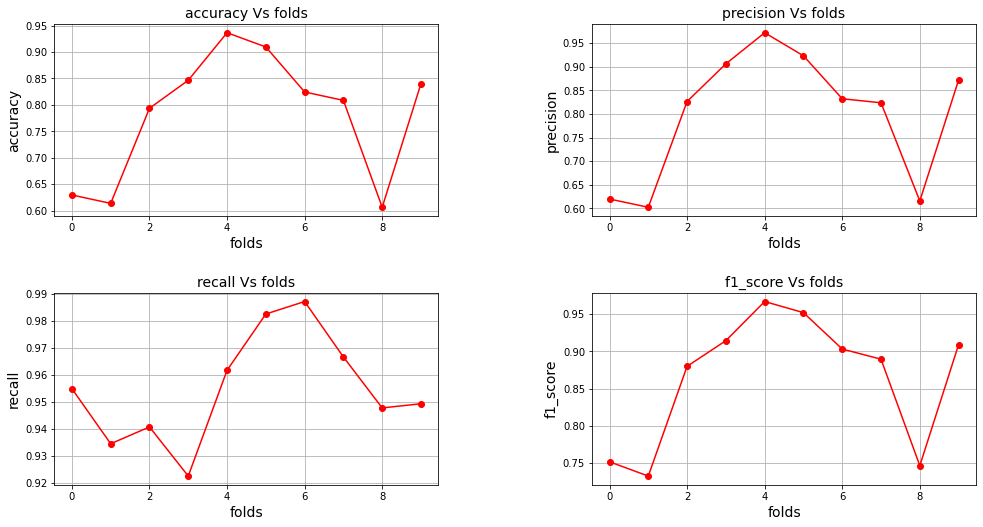

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
rf1= GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, random_state=42)
K_Fold_With_Dataset(Dataset_D,rf1)

#  MLP -Over sampling

Mean Accuracy for Random Forest Classifier:  0.6478526398739165
Mean precision for Random Forest Classifier:  0.8282198662456483
Mean recall for Random Forest Classifier:  0.6873210029212211
Mean f1_score for Random Forest Classifier:  0.7414273332083081


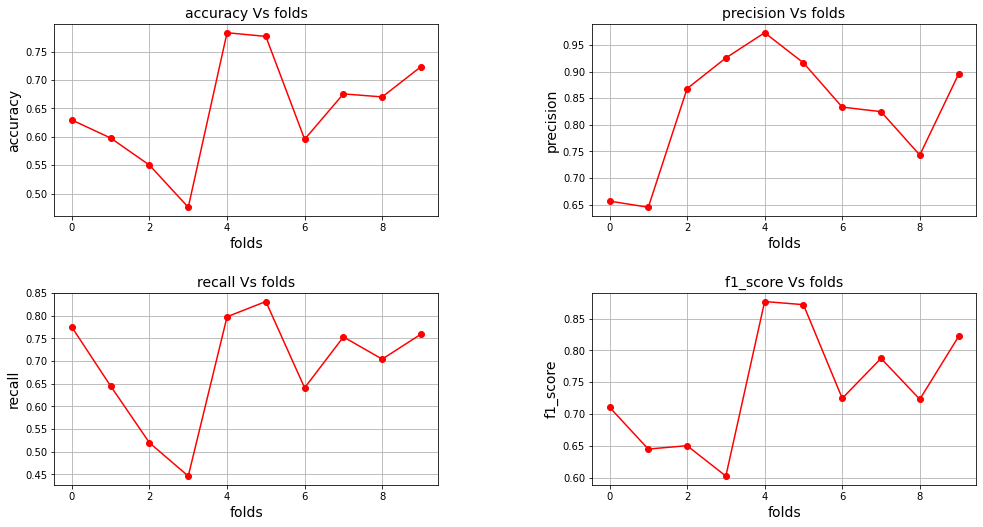

In [52]:
from sklearn.neural_network import MLPClassifier
rf1= MLPClassifier(hidden_layer_sizes=(400,200,50), max_iter=400,activation = 'relu',solver='adam',random_state=20)

K_Fold_With_Dataset(Dataset_D,rf1,sampling='Oversample')

# MLP - Under sampling

Mean Accuracy for Random Forest Classifier:  0.686522008330519
Mean precision for Random Forest Classifier:  0.8324877130547897
Mean recall for Random Forest Classifier:  0.7227687198971008
Mean f1_score for Random Forest Classifier:  0.7683554062364074


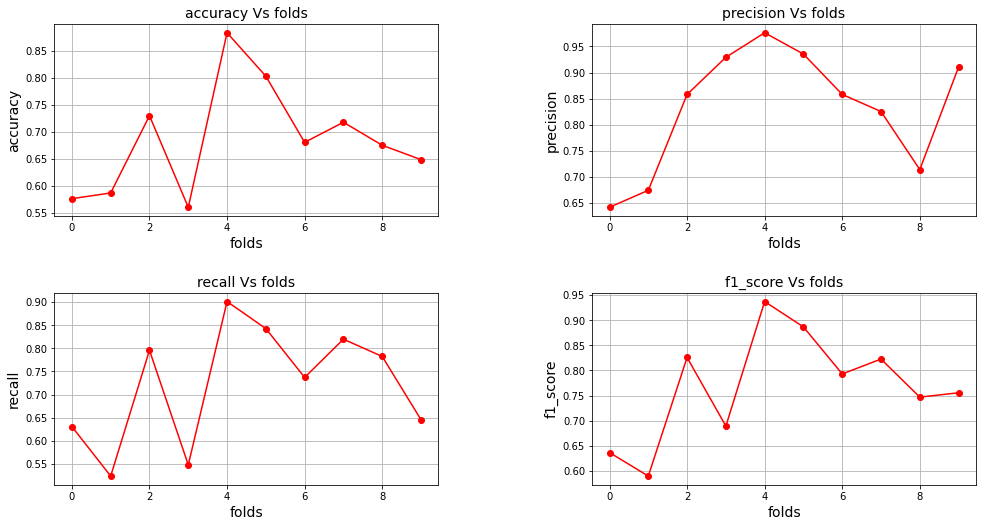

In [53]:
from sklearn.neural_network import MLPClassifier
rf1= MLPClassifier(hidden_layer_sizes=(200,300,50), max_iter=400,activation = 'relu',solver='adam',random_state=20)

K_Fold_With_Dataset(Dataset_D,rf1,sampling='Undersample')

# GB - Under sampling

Mean Accuracy for Random Forest Classifier:  0.6923871439828887
Mean precision for Random Forest Classifier:  0.8491692228650799
Mean recall for Random Forest Classifier:  0.7129530958243375
Mean f1_score for Random Forest Classifier:  0.772834977436723


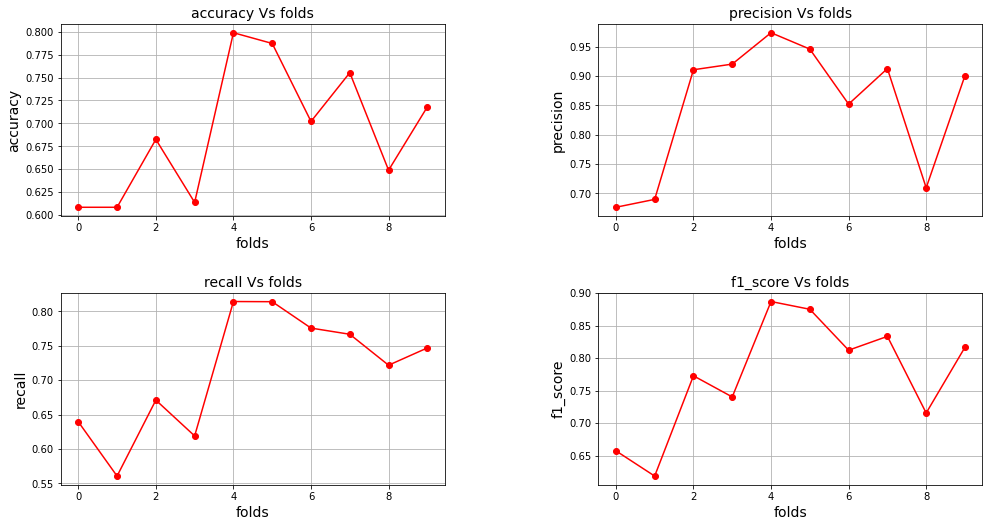

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
rf1= GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, random_state=42)
K_Fold_With_Dataset(Dataset_D,rf1,'Undersample')

# GB - Over sampling

Mean Accuracy for Random Forest Classifier:  0.7432961837217156
Mean precision for Random Forest Classifier:  0.8263141421986895
Mean recall for Random Forest Classifier:  0.8317105394370691
Mean f1_score for Random Forest Classifier:  0.8259884489145265


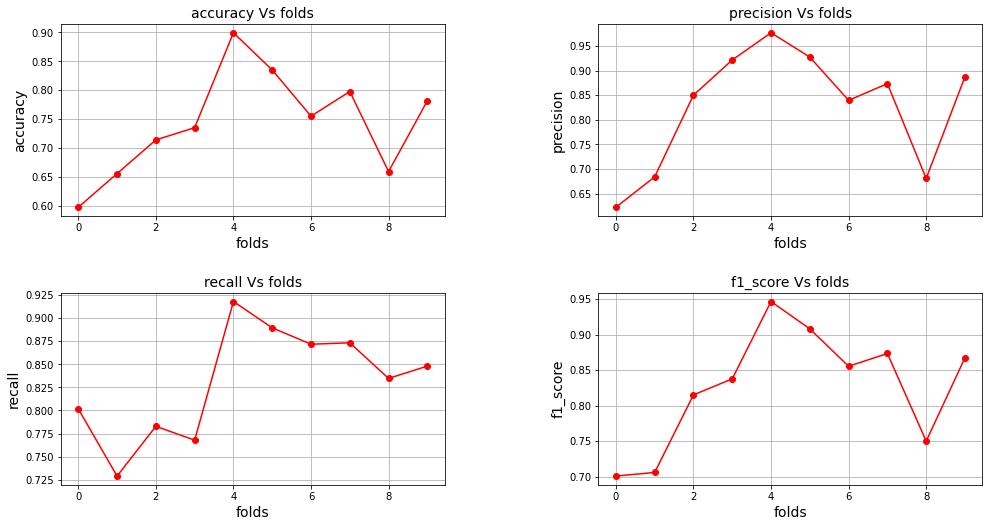

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
rf1= GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, random_state=42)
K_Fold_With_Dataset(Dataset_D,rf1, sampling='Oversample')

# Loading Heart Disease Data 

In [56]:
heart_data = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign2\heart.csv')
heart_data

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [57]:
heart_data_columns = heart_data.columns

print(heart_data_columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [58]:
print(heart_data.isna().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [59]:
data_nunique_dict = heart_data.nunique().to_dict()
data_nunique_dict

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trtbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalachh': 91,
 'exng': 2,
 'oldpeak': 40,
 'slp': 3,
 'caa': 5,
 'thall': 4,
 'output': 2}

In [60]:
heart_data.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [61]:
heart_data_training = heart_data.iloc[ :, :13]
heart_data_training

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[303 rows x 13 columns]

In [62]:
heart_data_training.shape

(303, 13)

In [63]:
heart_data_target = heart_data['output']
heart_data_target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [64]:
c= Counter(heart_data_target)
print(c)

Counter({1: 165, 0: 138})


# General function for Heart Disease Data 

In [65]:
def Plot_graph(accuracy,precision,f1_score_measure,recall):
    figure = plt.figure(figsize= (16,8))
    
    figure.tight_layout(pad=5.0)
    folds = [i for i in range(len(accuracy))]
    
    plt.subplot(2, 2, 1)
    plt.plot(folds, accuracy,color='red', marker='o')
    plt.title('accuracy Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(folds, precision,color='red', marker='o')
    plt.title('precision Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('precision', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,3)
    plt.plot(folds, recall,color='red', marker='o')
    plt.title('recall Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('recall', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,4)
    plt.plot(folds, f1_score_measure,color='red', marker='o')
    plt.title('f1_score Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('f1_score', fontsize=14)
    plt.grid(True)
    
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

def get_mean(accuracy,error,precision,f1_score_measure,recall):
    
    print("Mean Accuracy for Random Forest Classifier: ", mean(accuracy))
    print("Mean precision for Random Forest Classifier: ", mean(precision))
    print("Mean recall for Random Forest Classifier: ", mean(recall))
    print("Mean f1_score for Random Forest Classifier: ", mean(f1_score_measure))
    
def K_Fold_With_Dataset(Dataset_D,clf,sampling=None):
    kfold = KFold(n_splits=10, shuffle=False)
    error=[]
    accuracy=[]
    precision=[]
    recall=[]
    f1_score_measure=[]
    for train_index, test_index in kfold.split(heart_data_training):
        xtrain,xtest = heart_data_training.iloc[train_index],heart_data_training.iloc[test_index]
        ytrain,ytest = heart_data_target.iloc[train_index],heart_data_target.iloc[test_index]
        
        rf1 = clf
        if sampling=='Oversample':
            oversample = SMOTE()
            X_DB1, Y_DB1 = oversample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB1, Y_DB1)
            
        elif sampling=='Undersample':
            undersample = EditedNearestNeighbours()
            X_DB2, Y_DB2 = undersample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB2, Y_DB2)
        else:
            rf1=rf1.fit(xtrain, ytrain)
        
        
        RF_predictions = rf1.predict(xtest)
        
        error.append(mean_squared_error(ytest,RF_predictions))
        accuracy.append(accuracy_score(ytest, RF_predictions))
        precision.append(precision_score(ytest, RF_predictions))
        recall.append(recall_score(ytest, RF_predictions))
        f1_score_measure.append(f1_score(ytest, RF_predictions))
        
        
    get_mean(accuracy,error,precision,f1_score_measure,recall)
    Plot_graph(accuracy,precision,f1_score_measure,recall)

# RandomForest on heart data

e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Mean Accuracy for Random Forest Classifier:  0.7846236559139785
Mean precision for Random Forest Classifier:  0.5733333333333334
Mean recall for Random Forest Classifier:  0.5062903225806452
Mean f1_score for Random Forest Classifier:  0.5336489691662105


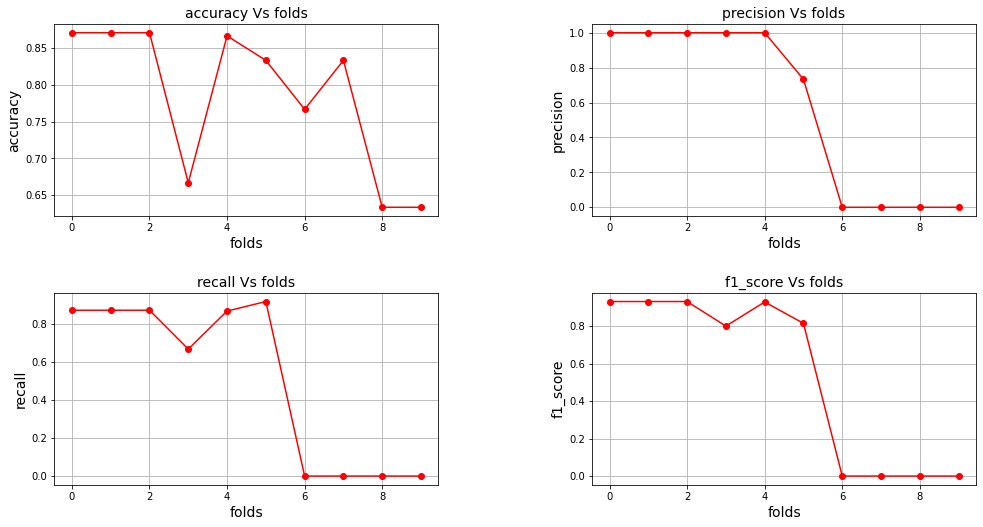

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(heart_data_training,rf1,sampling=None)

# Decision Tree on heart data

e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being se

Mean Accuracy for Random Forest Classifier:  0.7354838709677419
Mean precision for Random Forest Classifier:  0.575
Mean recall for Random Forest Classifier:  0.4754838709677419
Mean f1_score for Random Forest Classifier:  0.5130149712318839


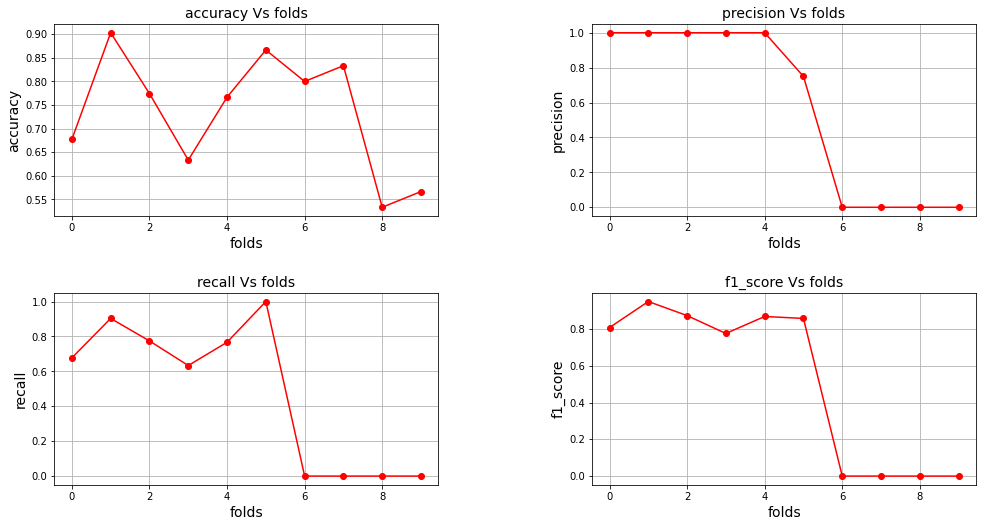

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

rf1 = DecisionTreeClassifier()
K_Fold_With_Dataset(heart_data_training,rf1,sampling=None)

#  SVC on heart data

e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being se

Mean Accuracy for Random Forest Classifier:  0.8208602150537634
Mean precision for Random Forest Classifier:  0.5692307692307692
Mean recall for Random Forest Classifier:  0.5258602150537635
Mean f1_score for Random Forest Classifier:  0.5460307665716014


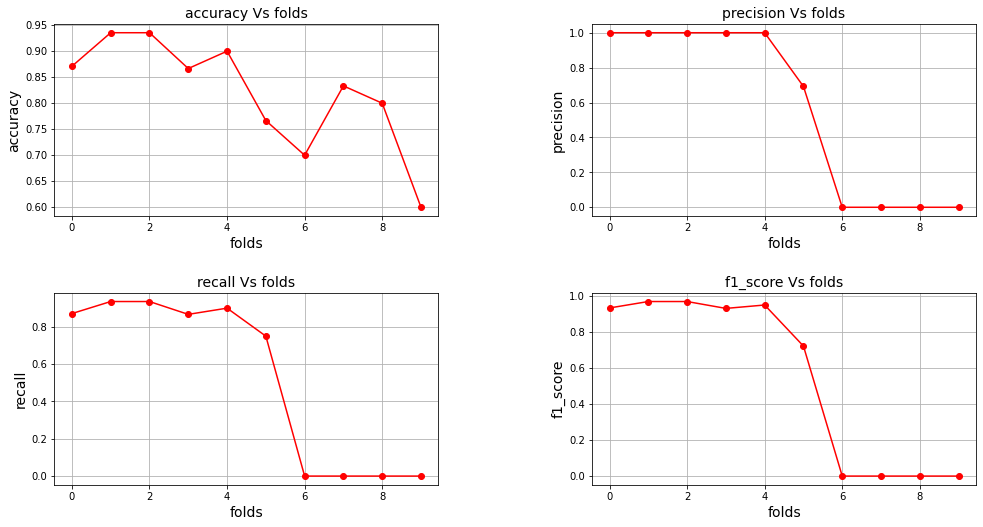

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

rf1 = SVC(kernel='linear')
K_Fold_With_Dataset(heart_data_training,rf1,sampling=None)

# KNN on heart data

e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being se

Mean Accuracy for Random Forest Classifier:  0.5602150537634408
Mean precision for Random Forest Classifier:  0.5555555555555556
Mean recall for Random Forest Classifier:  0.40021505376344085
Mean f1_score for Random Forest Classifier:  0.45257014997581035


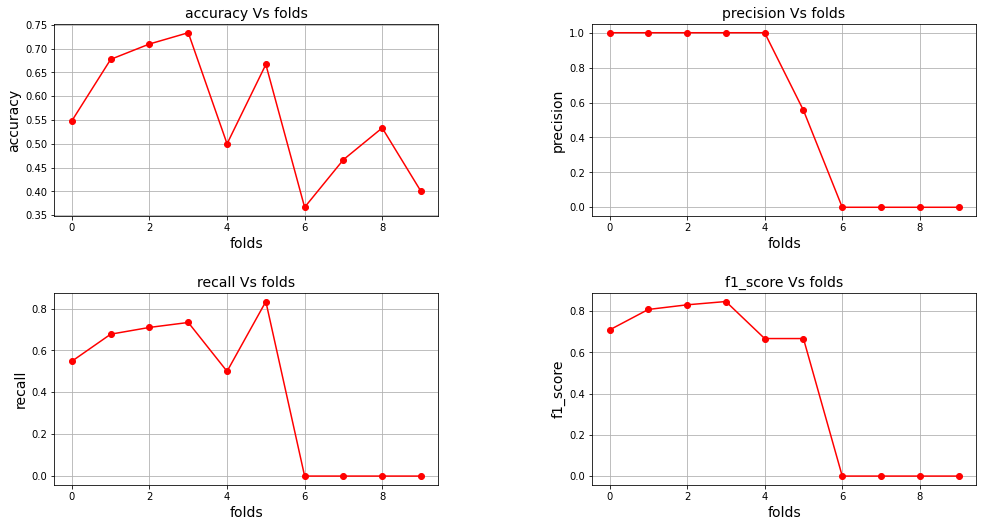

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

rf1 = KNeighborsClassifier(n_neighbors=9)
K_Fold_With_Dataset(heart_data_training,rf1,sampling="Oversampling")

#  MLP on heart data

e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being se

Mean Accuracy for Random Forest Classifier:  0.5682795698924731
Mean precision for Random Forest Classifier:  0.548
Mean recall for Random Forest Classifier:  0.42494623655913977
Mean f1_score for Random Forest Classifier:  0.44214383362990173


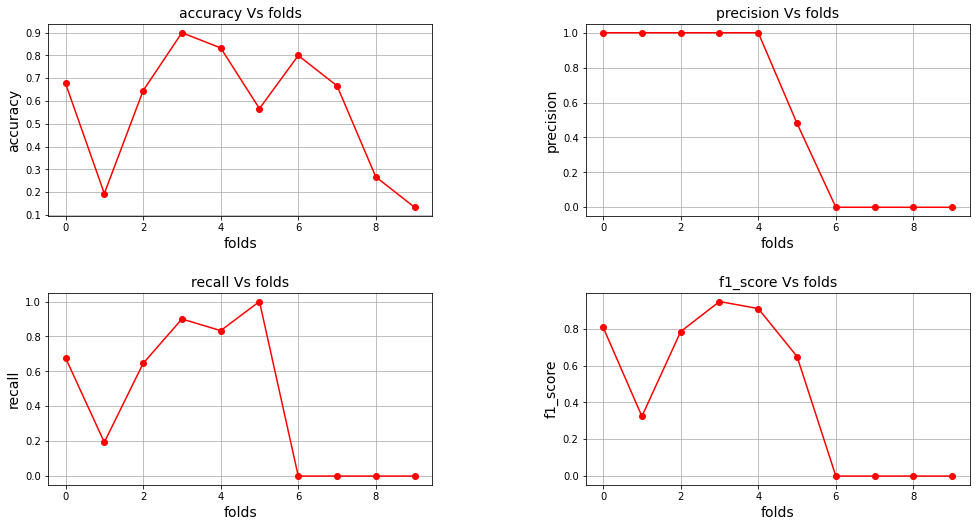

In [78]:
from sklearn.neural_network import MLPClassifier
rf1= MLPClassifier(hidden_layer_sizes=(200,300,50), max_iter=500,activation = 'relu',solver='adam',random_state=20)

K_Fold_With_Dataset(heart_data_training,rf1,sampling=None)

# GradientBoosting on heart data

e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\deeplizard\deeplizard\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being se

Mean Accuracy for Random Forest Classifier:  0.807741935483871
Mean precision for Random Forest Classifier:  0.5666666666666667
Mean recall for Random Forest Classifier:  0.5144086021505376
Mean f1_score for Random Forest Classifier:  0.5366820449514472


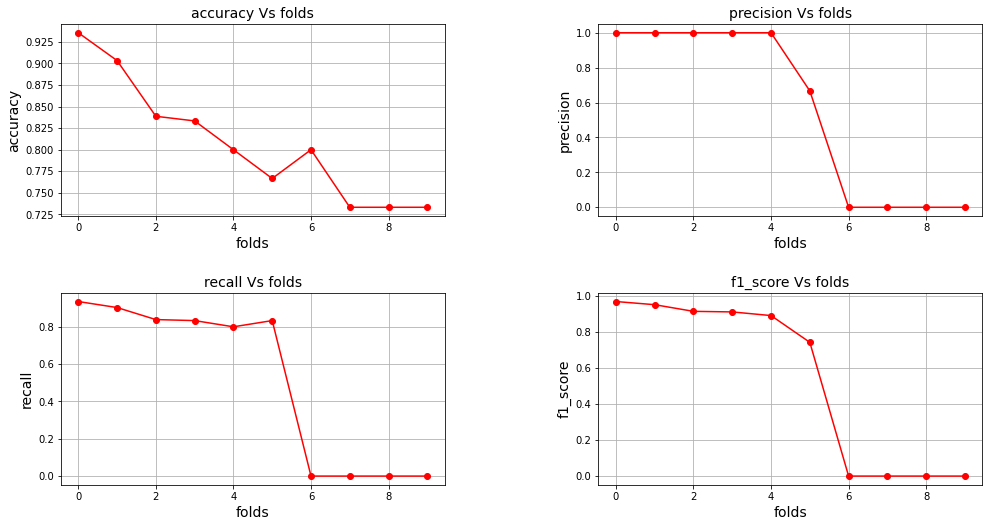

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
rf1= GradientBoostingClassifier(n_estimators=100, learning_rate=0.005, random_state=42)
K_Fold_With_Dataset(heart_data_training,rf1, sampling='Oversample')

# Loading Labour Data 

In [80]:

labour_data = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign2\labor_negotiations.csv',na_values=['?'])
labour_data

duration  wage-increase-first-year  wage-increase-second-year  \
0        1.0                       5.0                        NaN   
1        2.0                       4.5                        5.8   
2        NaN                       NaN                        NaN   
3        3.0                       3.7                        4.0   
4        3.0                       4.5                        4.5   
5        2.0                       2.0                        2.5   
6        3.0                       4.0                        5.0   
7        3.0                       6.9                        4.8   
8        2.0                       3.0                        7.0   
9        1.0                       5.7                        NaN   
10       3.0                       3.5                        4.0   
11       2.0                       6.4                        6.4   
12       2.0                       3.5                        4.0   
13       3.0                       3.5                        4.0   
14       1.0                       3.0                        NaN   
15       2.0                       4.5                        4.0   
16       1.0                       2.8                        NaN   
17       1.0                       2.1                        NaN   
18       1.0                       2.0                        NaN   
19       2.0                       4.0                        5.0   
20       2.0                       4.3                        4.4   
21       2.0                       2.5                        3.0   
22       3.0                       3.5                        4.0   
23       2.0                       4.5                        4.0   
24       1.0                       6.0                        NaN   
25       3.0                       2.0                        2.0   
26       2.0                       4.5                        4.5   
27       2.0                       3.0                        3.0   
28       2.0                       5.0                        4.0   
29       3.0                       2.0                        2.5   
30       3.0                       4.5                        4.5   
31       3.0                       3.0                        2.0   
32       2.0                       2.5                        2.5   
33       2.0                       4.0                        5.0   
34       3.0                       2.0                        2.5   
35       2.0                       2.0                        2.0   
36       1.0                       2.0                        NaN   
37       1.0                       2.8                        NaN   
38       3.0                       2.0                        2.5   
39       2.0                       4.5                        4.0   
40       1.0                       4.0                        NaN   
41       2.0                       2.0                        3.0   
42       2.0                       2.5                        2.5   
43       2.0                       2.5                        3.0   
44       2.0                       4.0                        4.0   
45       2.0                       4.5                        4.0   
46       2.0                       4.5                        4.0   
47       2.0                       4.6                        4.6   
48       2.0                       5.0                        4.5   
49       2.0                       5.7                        4.5   
50       2.0                       7.0                        5.3   
51       3.0                       2.0                        3.0   
52       3.0                       3.5                        4.0   
53       3.0                       4.0                        3.5   
54       3.0                       5.0                        4.4   
55       3.0                       5.0                        5.0   
56       3.0                       6.0                        6.0   

 

In [81]:
labour_data_columns = labour_data.columns



In [82]:
print(labour_data_columns)



Index(['duration', 'wage-increase-first-year', 'wage-increase-second-year',
       'wage-increase-third-year', 'cost-of-living-adjustment',
       'working-hours', 'pension', 'standby-pay', 'shift-differential',
       'education-allowance', 'statutory-holidays', 'vacation',
       'longterm-disability-assistance', 'contribution-to-dental-plan',
       'bereavement-assistance', 'contribution-to-health-plan', 'class'],
      dtype='object')


In [83]:
print(labour_data.isna().sum())



duration                           1
wage-increase-first-year           1
wage-increase-second-year         11
wage-increase-third-year          42
cost-of-living-adjustment         20
working-hours                      6
pension                           30
standby-pay                       48
shift-differential                26
education-allowance               35
statutory-holidays                 4
vacation                           6
longterm-disability-assistance    29
contribution-to-dental-plan       20
bereavement-assistance            27
contribution-to-health-plan       20
class                              0
dtype: int64


In [84]:
labour_data.shape[0]



57

# Handling Missing data

In [85]:
def percentages_of_missing_data(DataFrame):
    print(DataFrame.shape)
    for i in DataFrame.columns:
        #print(i)
        l=DataFrame.shape[0]
        total_nulls=sum(pd.isnull(DataFrame[i]))
        if (total_nulls/l > 0.2):
            print('\tDropping column: ',i, '\tNumber of nulls : ',total_nulls,'\tPercentages of nulls: ',round((total_nulls/l * 100),2))
            DataFrame = DataFrame.drop(i, axis=1)
    
    return DataFrame
    



In [86]:
labour_data

duration  wage-increase-first-year  wage-increase-second-year  \
0        1.0                       5.0                        NaN   
1        2.0                       4.5                        5.8   
2        NaN                       NaN                        NaN   
3        3.0                       3.7                        4.0   
4        3.0                       4.5                        4.5   
5        2.0                       2.0                        2.5   
6        3.0                       4.0                        5.0   
7        3.0                       6.9                        4.8   
8        2.0                       3.0                        7.0   
9        1.0                       5.7                        NaN   
10       3.0                       3.5                        4.0   
11       2.0                       6.4                        6.4   
12       2.0                       3.5                        4.0   
13       3.0                       3.5                        4.0   
14       1.0                       3.0                        NaN   
15       2.0                       4.5                        4.0   
16       1.0                       2.8                        NaN   
17       1.0                       2.1                        NaN   
18       1.0                       2.0                        NaN   
19       2.0                       4.0                        5.0   
20       2.0                       4.3                        4.4   
21       2.0                       2.5                        3.0   
22       3.0                       3.5                        4.0   
23       2.0                       4.5                        4.0   
24       1.0                       6.0                        NaN   
25       3.0                       2.0                        2.0   
26       2.0                       4.5                        4.5   
27       2.0                       3.0                        3.0   
28       2.0                       5.0                        4.0   
29       3.0                       2.0                        2.5   
30       3.0                       4.5                        4.5   
31       3.0                       3.0                        2.0   
32       2.0                       2.5                        2.5   
33       2.0                       4.0                        5.0   
34       3.0                       2.0                        2.5   
35       2.0                       2.0                        2.0   
36       1.0                       2.0                        NaN   
37       1.0                       2.8                        NaN   
38       3.0                       2.0                        2.5   
39       2.0                       4.5                        4.0   
40       1.0                       4.0                        NaN   
41       2.0                       2.0                        3.0   
42       2.0                       2.5                        2.5   
43       2.0                       2.5                        3.0   
44       2.0                       4.0                        4.0   
45       2.0                       4.5                        4.0   
46       2.0                       4.5                        4.0   
47       2.0                       4.6                        4.6   
48       2.0                       5.0                        4.5   
49       2.0                       5.7                        4.5   
50       2.0                       7.0                        5.3   
51       3.0                       2.0                        3.0   
52       3.0                       3.5                        4.0   
53       3.0                       4.0                        3.5   
54       3.0                       5.0                        4.4   
55       3.0                       5.0                        5.0   
56       3.0                       6.0                        6.0   

 

In [87]:
labour_After_dropping = percentages_of_missing_data(labour_data)
labour_After_dropping



(57, 17)
	Dropping column:  wage-increase-third-year 	Number of nulls :  42 	Percentages of nulls:  73.68
	Dropping column:  cost-of-living-adjustment 	Number of nulls :  20 	Percentages of nulls:  35.09
	Dropping column:  pension 	Number of nulls :  30 	Percentages of nulls:  52.63
	Dropping column:  standby-pay 	Number of nulls :  48 	Percentages of nulls:  84.21
	Dropping column:  shift-differential 	Number of nulls :  26 	Percentages of nulls:  45.61
	Dropping column:  education-allowance 	Number of nulls :  35 	Percentages of nulls:  61.4
	Dropping column:  longterm-disability-assistance 	Number of nulls :  29 	Percentages of nulls:  50.88
	Dropping column:  contribution-to-dental-plan 	Number of nulls :  20 	Percentages of nulls:  35.09
	Dropping column:  bereavement-assistance 	Number of nulls :  27 	Percentages of nulls:  47.37
	Dropping column:  contribution-to-health-plan 	Number of nulls :  20 	Percentages of nulls:  35.09


duration  wage-increase-first-year  wage-increase-second-year  \
0        1.0                       5.0                        NaN   
1        2.0                       4.5                        5.8   
2        NaN                       NaN                        NaN   
3        3.0                       3.7                        4.0   
4        3.0                       4.5                        4.5   
5        2.0                       2.0                        2.5   
6        3.0                       4.0                        5.0   
7        3.0                       6.9                        4.8   
8        2.0                       3.0                        7.0   
9        1.0                       5.7                        NaN   
10       3.0                       3.5                        4.0   
11       2.0                       6.4                        6.4   
12       2.0                       3.5                        4.0   
13       3.0                       3.5                        4.0   
14       1.0                       3.0                        NaN   
15       2.0                       4.5                        4.0   
16       1.0                       2.8                        NaN   
17       1.0                       2.1                        NaN   
18       1.0                       2.0                        NaN   
19       2.0                       4.0                        5.0   
20       2.0                       4.3                        4.4   
21       2.0                       2.5                        3.0   
22       3.0                       3.5                        4.0   
23       2.0                       4.5                        4.0   
24       1.0                       6.0                        NaN   
25       3.0                       2.0                        2.0   
26       2.0                       4.5                        4.5   
27       2.0                       3.0                        3.0   
28       2.0                       5.0                        4.0   
29       3.0                       2.0                        2.5   
30       3.0                       4.5                        4.5   
31       3.0                       3.0                        2.0   
32       2.0                       2.5                        2.5   
33       2.0                       4.0                        5.0   
34       3.0                       2.0                        2.5   
35       2.0                       2.0                        2.0   
36       1.0                       2.0                        NaN   
37       1.0                       2.8                        NaN   
38       3.0                       2.0                        2.5   
39       2.0                       4.5                        4.0   
40       1.0                       4.0                        NaN   
41       2.0                       2.0                        3.0   
42       2.0                       2.5                        2.5   
43       2.0                       2.5                        3.0   
44       2.0                       4.0                        4.0   
45       2.0                       4.5                        4.0   
46       2.0                       4.5                        4.0   
47       2.0                       4.6                        4.6   
48       2.0                       5.0                        4.5   
49       2.0                       5.7                        4.5   
50       2.0                       7.0                        5.3   
51       3.0                       2.0                        3.0   
52       3.0                       3.5                        4.0   
53       3.0                       4.0                        3.5   
54       3.0                       5.0                        4.4   
55       3.0                       5.0                        5.0   
56       3.0                       6.0                        6.0   

 

In [88]:
print(labour_After_dropping.isna().sum())



duration                      1
wage-increase-first-year      1
wage-increase-second-year    11
working-hours                 6
statutory-holidays            4
vacation                      6
class                         0
dtype: int64


#  Replacing missing data with mode 

In [89]:
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
    most_frequent_category=DataFrame[ColName].mode()[0]
    # replace nan values with most occured category
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
    return DataFrame


In [90]:
labour_After_dropping=impute_nan_most_frequent_category(labour_After_dropping,'vacation')

labour_After_dropping=impute_nan_most_frequent_category(labour_After_dropping,'working-hours')

labour_After_dropping=impute_nan_most_frequent_category(labour_After_dropping,'wage-increase-second-year')

labour_After_dropping=impute_nan_most_frequent_category(labour_After_dropping,'wage-increase-first-year')

labour_After_dropping=impute_nan_most_frequent_category(labour_After_dropping,'duration')

Data_columns = ['vacation','working-hours','wage-increase-second-year','wage-increase-first-year','duration','statutory-holidays']

for i in Data_columns:
    labour_After_dropping = impute_nan_most_frequent_category(labour_After_dropping,i)

In [91]:
labour_After_dropping.duration = labour_After_dropping.duration_Imputed


labour_After_dropping["wage-increase-first-year"] = labour_After_dropping["wage-increase-first-year_Imputed"]
labour_After_dropping["wage-increase-second-year"] = labour_After_dropping["wage-increase-second-year_Imputed"]

labour_After_dropping["working-hours"] = labour_After_dropping["working-hours_Imputed"]

labour_After_dropping["statutory-holidays"] = labour_After_dropping["statutory-holidays_Imputed"]
labour_After_dropping["vacation"] = labour_After_dropping["vacation_Imputed"]

impute_nan_most_frequent_category(labour_After_dropping,'statutory-holidays')

labour_After_dropping

duration  wage-increase-first-year  wage-increase-second-year  \
0        1.0                       5.0                        4.0   
1        2.0                       4.5                        5.8   
2        2.0                       2.0                        4.0   
3        3.0                       3.7                        4.0   
4        3.0                       4.5                        4.5   
5        2.0                       2.0                        2.5   
6        3.0                       4.0                        5.0   
7        3.0                       6.9                        4.8   
8        2.0                       3.0                        7.0   
9        1.0                       5.7                        4.0   
10       3.0                       3.5                        4.0   
11       2.0                       6.4                        6.4   
12       2.0                       3.5                        4.0   
13       3.0                       3.5                        4.0   
14       1.0                       3.0                        4.0   
15       2.0                       4.5                        4.0   
16       1.0                       2.8                        4.0   
17       1.0                       2.1                        4.0   
18       1.0                       2.0                        4.0   
19       2.0                       4.0                        5.0   
20       2.0                       4.3                        4.4   
21       2.0                       2.5                        3.0   
22       3.0                       3.5                        4.0   
23       2.0                       4.5                        4.0   
24       1.0                       6.0                        4.0   
25       3.0                       2.0                        2.0   
26       2.0                       4.5                        4.5   
27       2.0                       3.0                        3.0   
28       2.0                       5.0                        4.0   
29       3.0                       2.0                        2.5   
30       3.0                       4.5                        4.5   
31       3.0                       3.0                        2.0   
32       2.0                       2.5                        2.5   
33       2.0                       4.0                        5.0   
34       3.0                       2.0                        2.5   
35       2.0                       2.0                        2.0   
36       1.0                       2.0                        4.0   
37       1.0                       2.8                        4.0   
38       3.0                       2.0                        2.5   
39       2.0                       4.5                        4.0   
40       1.0                       4.0                        4.0   
41       2.0                       2.0                        3.0   
42       2.0                       2.5                        2.5   
43       2.0                       2.5                        3.0   
44       2.0                       4.0                        4.0   
45       2.0                       4.5                        4.0   
46       2.0                       4.5                        4.0   
47       2.0                       4.6                        4.6   
48       2.0                       5.0                        4.5   
49       2.0                       5.7                        4.5   
50       2.0                       7.0                        5.3   
51       3.0                       2.0                        3.0   
52       3.0                       3.5                        4.0   
53       3.0                       4.0                        3.5   
54       3.0                       5.0                        4.4   
55       3.0                       5.0                        5.0   
56       3.0                       6.0                        6.0   

 

In [92]:
Data_columns = ['vacation','working-hours','wage-increase-second-year','wage-increase-first-year','duration','statutory-holidays']

for i in Data_columns:
    print(i)
    labour_After_dropping = labour_After_dropping.drop(i+str("_Imputed"), axis=1)


vacation
working-hours
wage-increase-second-year
wage-increase-first-year
duration
statutory-holidays


In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labour_After_dropping['class']= labelencoder.fit_transform(labour_After_dropping['class'])
labour_After_dropping['vacation']= labelencoder.fit_transform(labour_After_dropping['vacation'])

labour_After_dropping

duration  wage-increase-first-year  wage-increase-second-year  \
0        1.0                       5.0                        4.0   
1        2.0                       4.5                        5.8   
2        2.0                       2.0                        4.0   
3        3.0                       3.7                        4.0   
4        3.0                       4.5                        4.5   
5        2.0                       2.0                        2.5   
6        3.0                       4.0                        5.0   
7        3.0                       6.9                        4.8   
8        2.0                       3.0                        7.0   
9        1.0                       5.7                        4.0   
10       3.0                       3.5                        4.0   
11       2.0                       6.4                        6.4   
12       2.0                       3.5                        4.0   
13       3.0                       3.5                        4.0   
14       1.0                       3.0                        4.0   
15       2.0                       4.5                        4.0   
16       1.0                       2.8                        4.0   
17       1.0                       2.1                        4.0   
18       1.0                       2.0                        4.0   
19       2.0                       4.0                        5.0   
20       2.0                       4.3                        4.4   
21       2.0                       2.5                        3.0   
22       3.0                       3.5                        4.0   
23       2.0                       4.5                        4.0   
24       1.0                       6.0                        4.0   
25       3.0                       2.0                        2.0   
26       2.0                       4.5                        4.5   
27       2.0                       3.0                        3.0   
28       2.0                       5.0                        4.0   
29       3.0                       2.0                        2.5   
30       3.0                       4.5                        4.5   
31       3.0                       3.0                        2.0   
32       2.0                       2.5                        2.5   
33       2.0                       4.0                        5.0   
34       3.0                       2.0                        2.5   
35       2.0                       2.0                        2.0   
36       1.0                       2.0                        4.0   
37       1.0                       2.8                        4.0   
38       3.0                       2.0                        2.5   
39       2.0                       4.5                        4.0   
40       1.0                       4.0                        4.0   
41       2.0                       2.0                        3.0   
42       2.0                       2.5                        2.5   
43       2.0                       2.5                        3.0   
44       2.0                       4.0                        4.0   
45       2.0                       4.5                        4.0   
46       2.0                       4.5                        4.0   
47       2.0                       4.6                        4.6   
48       2.0                       5.0                        4.5   
49       2.0                       5.7                        4.5   
50       2.0                       7.0                        5.3   
51       3.0                       2.0                        3.0   
52       3.0                       3.5                        4.0   
53       3.0                       4.0                        3.5   
54       3.0                       5.0                        4.4   
55       3.0                       5.0                        5.0   
56       3.0                       6.0                        6.0   

 

In [94]:

labour_After_dropping.iloc[:,:6]

labour_After_dropping.iloc[:,6:7]

class
0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      0
13      1
14      1
15      1
16      1
17      0
18      0
19      1
20      1
21      0
22      1
23      1
24      1
25      0
26      1
27      1
28      1
29      0
30      1
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1

# Train-test Split

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(labour_After_dropping.iloc[:,:6], labour_After_dropping.iloc[:,6:7], test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(38, 6) (19, 6) (38, 1) (19, 1)


#  Min-max scaling on data 

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


scaled_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)


scaled_x_train



duration  wage-increase-first-year  wage-increase-second-year  \
0        0.5                      0.60                   0.568182   
1        0.5                      0.00                   0.000000   
2        0.5                      0.60                   0.454545   
3        0.5                      0.10                   0.113636   
4        0.5                      0.50                   0.454545   
5        0.5                      0.50                   0.454545   
6        0.0                      0.60                   0.454545   
7        0.5                      0.50                   0.568182   
8        0.0                      0.00                   0.454545   
9        1.0                      0.50                   0.568182   
10       0.5                      0.10                   0.113636   
11       0.5                      0.50                   0.454545   
12       0.0                      0.16                   0.454545   
13       1.0                      0.00                   0.113636   
14       0.5                      0.52                   0.590909   
15       0.5                      0.30                   0.454545   
16       1.0                      0.40                   0.340909   
17       0.5                      0.50                   0.863636   
18       0.5                      0.40                   0.454545   
19       0.5                      0.74                   0.568182   
20       0.0                      0.00                   0.454545   
21       0.5                      0.40                   0.681818   
22       1.0                      0.60                   0.545455   
23       1.0                      0.98                   0.636364   
24       1.0                      0.40                   0.681818   
25       0.5                      0.88                   1.000000   
26       0.5                      0.46                   0.545455   
27       1.0                      0.60                   0.681818   
28       1.0                      0.30                   0.454545   
29       0.5                      1.00                   0.750000   
30       0.5                      0.50                   0.454545   
31       0.0                      0.40                   0.454545   
32       1.0                      0.34                   0.454545   
33       0.5                      0.00                   0.227273   
34       0.0                      0.02                   0.454545   
35       1.0                      0.50                   0.568182   
36       1.0                      0.30                   0.454545   
37       0.0                      0.20                   0.454545   

    working-hours  statutory-holidays  vacation  
0        0.846154            0.333333       0.5  
1        1.000000            0.333333       0.0  
2        0.769231            0.333333       0.5  
3        0.846154            0.166667       0.0  
4        1.000000            0.500000       0.0  
5        0.769231            0.333333       0.0  
6        1.000000            0.333333       0.0  
7        1.000000            0.166667       0.5  
8        0.846154            0.333333       0.0  
9        1.000000            0.500000       0.0  
10       0.923077            0.500000       0.0  
11       1.000000            0.166667       1.0  
12       0.615385            0.500000       0.5  
13       1.000000            0.166667       0.5  
14       0.846154            0.333333       0.5  
15       1.000000            0.166667       0.5  
16       1.000000            0.333333       0.0  
17       0.615385            0.333333       0.5  
18       1.000000            0.166667       0.5  
19       1.000000            0.333333       0.0  
20       1.000000            0.333333       1.0  
21       1.000000            0.166667       0.5  
22       0.846154            0.333333       1.0  
23       1.000000            0.500000       0.5  
24       1.000000            0.500000       1.0  
25       0.8

# Chi-sqaure test 

In [97]:
from sklearn.feature_selection import chi2
import pandas as pd
chi_scores = chi2(scaled_x_train,Y_train)

p_val = pd.Series(chi_scores[1])
p_val.index = scaled_x_train.columns
p_val

duration                     0.315052
wage-increase-first-year     0.101546
wage-increase-second-year    0.355884
working-hours                0.741637
statutory-holidays           0.460978
vacation                     0.737952
dtype: float64

In [98]:
p_val=p_val.sort_values(ascending=False)

p_val

working-hours                0.741637
vacation                     0.737952
statutory-holidays           0.460978
wage-increase-second-year    0.355884
duration                     0.315052
wage-increase-first-year     0.101546
dtype: float64

<AxesSubplot:>

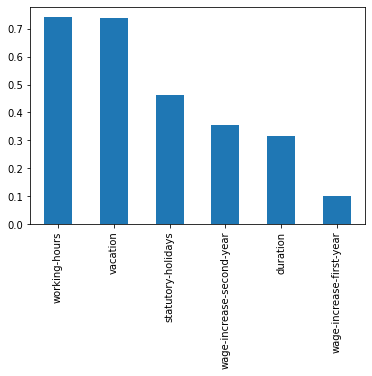

In [99]:


p_val.plot.bar()


# Feature selection

In [100]:
Labour_train_data = scaled_x_train[['working-hours','duration','statutory-holidays','vacation']]

Labour_test_data = scaled_x_test[['working-hours','duration','statutory-holidays','vacation']]



In [101]:
Labour_train_data



working-hours  duration  statutory-holidays  vacation
0        0.846154       0.5            0.333333       0.5
1        1.000000       0.5            0.333333       0.0
2        0.769231       0.5            0.333333       0.5
3        0.846154       0.5            0.166667       0.0
4        1.000000       0.5            0.500000       0.0
5        0.769231       0.5            0.333333       0.0
6        1.000000       0.0            0.333333       0.0
7        1.000000       0.5            0.166667       0.5
8        0.846154       0.0            0.333333       0.0
9        1.000000       1.0            0.500000       0.0
10       0.923077       0.5            0.500000       0.0
11       1.000000       0.5            0.166667       1.0
12       0.615385       0.0            0.500000       0.5
13       1.000000       1.0            0.166667       0.5
14       0.846154       0.5            0.333333       0.5
15       1.000000       0.5            0.166667       0.5
16       1.000000       1.0            0.333333       0.0
17       0.615385       0.5            0.333333       0.5
18       1.000000       0.5            0.166667       0.5
19       1.000000       0.5            0.333333       0.0
20       1.000000       0.0            0.333333       1.0
21       1.000000       0.5            0.166667       0.5
22       0.846154       1.0            0.333333       1.0
23       1.000000       1.0            0.500000       0.5
24       1.000000       1.0            0.500000       1.0
25       0.846154       0.5            1.000000       0.5
26       0.846154       0.5            0.500000       1.0
27       1.000000       1.0            0.500000       0.0
28       0.615385       1.0            0.666667       1.0
29       1.000000       0.5            0.333333       0.5
30       1.000000       0.5            0.166667       0.5
31       1.000000       0.0            0.333333       0.0
32       1.000000       1.0            0.333333       0.5
33       0.846154       0.5            0.500000       1.0
34       1.000000       0.0            0.000000       0.5
35       1.000000       1.0            0.333333       0.0
36       0.000000       1.0            0.333333       0.5
37       0.692308       0.0            0.333333       1.0

In [102]:
Labour_test_data

working-hours  duration  statutory-holidays  vacation
0        0.692308       1.0            0.666667       1.0
1        0.615385       1.0            0.000000       1.0
2        0.846154       0.0            0.000000       1.0
3        1.000000       0.5            0.333333       0.5
4        1.000000       0.0            0.333333       1.0
5        0.615385       1.0            0.166667       0.0
6        0.461538       0.5            0.500000       1.0
7        0.769231       1.0            0.166667       0.0
8        0.846154       0.5            0.333333       0.5
9        0.615385       0.5            1.000000       1.0
10       1.000000       0.5            0.333333       0.0
11       0.615385       0.5            0.500000       0.0
12       0.769231       1.0            0.666667       1.0
13       0.846154       0.5            0.333333       1.0
14       0.846154       0.0            0.000000       0.5
15       1.000000       1.0            0.166667       0.5
16       1.000000       0.5            0.333333       0.5
17       1.000000       1.0            0.166667       0.5
18       1.000000       1.0            0.333333       0.5

In [103]:
labour_final=labour_After_dropping.iloc[:,:6]

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_labour_train = pd.DataFrame(
    scaler.fit_transform(labour_final),
    columns = labour_final.columns
)


In [105]:
scaled_labour_train=scaled_labour_train[['working-hours','duration','statutory-holidays','vacation']]

scaled_labour_train

working-hours  duration  statutory-holidays  vacation
0        1.000000       0.0            0.333333       0.0
1        0.615385       0.5            0.333333       0.5
2        0.846154       0.5            0.333333       1.0
3        1.000000       1.0            0.333333       0.5
4        1.000000       1.0            0.500000       0.0
5        0.615385       0.5            0.500000       0.0
6        1.000000       1.0            0.500000       1.0
7        1.000000       1.0            0.500000       0.5
8        0.846154       0.5            0.333333       0.5
9        1.000000       0.0            0.333333       1.0
10       0.692308       1.0            0.666667       1.0
11       0.846154       0.5            1.000000       0.5
12       1.000000       0.5            0.166667       0.5
13       0.769231       1.0            0.666667       1.0
14       0.692308       0.0            0.333333       1.0
15       0.769231       0.5            0.333333       0.0
16       0.615385       0.0            0.500000       0.5
17       1.000000       0.0            0.000000       0.5
18       0.846154       0.0            0.333333       0.0
19       0.615385       0.5            1.000000       1.0
20       0.846154       0.5            0.500000       1.0
21       1.000000       0.5            0.333333       0.5
22       0.000000       1.0            0.333333       0.5
23       1.000000       0.5            0.166667       1.0
24       0.846154       0.0            0.000000       1.0
25       1.000000       1.0            0.166667       0.5
26       1.000000       0.5            0.166667       0.5
27       0.461538       0.5            0.500000       1.0
28       0.769231       0.5            0.333333       0.5
29       0.615385       1.0            0.166667       0.0
30       1.000000       1.0            0.333333       0.0
31       1.000000       1.0            0.166667       0.5
32       0.846154       0.5            0.166667       0.0
33       1.000000       0.5            0.166667       0.5
34       1.000000       1.0            0.166667       0.5
35       1.000000       0.5            0.333333       0.0
36       1.000000       0.0            0.333333       1.0
37       0.846154       0.0            0.000000       0.5
38       0.769231       1.0            0.166667       0.0
39       1.000000       0.5            0.500000       0.0
40       1.000000       0.0            0.333333       0.0
41       0.846154       0.5            0.500000       1.0
42       0.923077       0.5            0.500000       0.0
43       1.000000       0.5            0.333333       0.5
44       1.000000       0.5            0.166667       0.5
45       1.000000       0.5            0.166667       0.5
46       1.000000       0.5            0.333333       0.0
47       0.846154       0.5            0.333333       0.5
48       0.846154       0.5            0.333333       0.5
49       1.000000       0.5            0.333333       0.0
50       1.000000       0.5            0.333333       0.5
51       1.000000       1.0            0.333333       0.5
52       0.615385       1.0            0.666667       1.0
53       1.000000       1.0            0.333333       0.0
54       0.846154       1.0            0.333333       1.0
55       1.000000       1.0            0.500000       0.0
56       0.615385       1.0            0.000000       1.0

In [106]:
labour_target = labour_After_dropping['class']

labour_target

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    0
18    0
19    1
20    1
21    0
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    0
30    1
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    1
40    0
41    0
42    0
43    0
44    0
45    0
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
Name: class, dtype: int32

# General Function for Labour-data

In [107]:
def Plot_graph(accuracy,precision,f1_score_measure,recall):
    figure = plt.figure(figsize= (16,8))
    
    figure.tight_layout(pad=5.0)
    folds = [i for i in range(len(accuracy))]
    
    plt.subplot(2, 2, 1)
    plt.plot(folds, accuracy,color='red', marker='o')
    plt.title('accuracy Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(folds, precision,color='red', marker='o')
    plt.title('precision Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('precision', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,3)
    plt.plot(folds, recall,color='red', marker='o')
    plt.title('recall Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('recall', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,4)
    plt.plot(folds, f1_score_measure,color='red', marker='o')
    plt.title('f1_score Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('f1_score', fontsize=14)
    plt.grid(True)
    
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

def get_mean(accuracy,error,precision,f1_score_measure,recall):
    
    print("Mean Accuracy for Random Forest Classifier: ", mean(accuracy))
    print("Mean precision for Random Forest Classifier: ", mean(precision))
    print("Mean recall for Random Forest Classifier: ", mean(recall))
    print("Mean f1_score for Random Forest Classifier: ", mean(f1_score_measure))
    
def K_Fold_With_Dataset(Dataset_D,clf,sampling=None):
    kfold = KFold(n_splits=10, shuffle=False)
    error=[]
    accuracy=[]
    precision=[]
    recall=[]
    f1_score_measure=[]
    for train_index, test_index in kfold.split(scaled_labour_train):
        xtrain,xtest = scaled_labour_train.iloc[train_index],scaled_labour_train.iloc[test_index]
        ytrain,ytest = labour_target.iloc[train_index],labour_target.iloc[test_index]
        
        rf1 = clf
        if sampling=='Oversample':
            oversample = SMOTE()
            X_DB1, Y_DB1 = oversample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB1, Y_DB1)
            
        elif sampling=='Undersample':
            undersample = EditedNearestNeighbours()
            X_DB2, Y_DB2 = undersample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB2, Y_DB2)
        else:
            rf1=rf1.fit(xtrain, ytrain)
        
        
        RF_predictions = rf1.predict(xtest)
        
        error.append(mean_squared_error(ytest,RF_predictions))
        accuracy.append(accuracy_score(ytest, RF_predictions))
        precision.append(precision_score(ytest, RF_predictions))
        recall.append(recall_score(ytest, RF_predictions))
        f1_score_measure.append(f1_score(ytest, RF_predictions))
        
        
    get_mean(accuracy,error,precision,f1_score_measure,recall)
    Plot_graph(accuracy,precision,f1_score_measure,recall)




#  RF on heart data

e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\deeplizard\deeplizard\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Mean Accuracy for Random Forest Classifier:  0.79
Mean precision for Random Forest Classifier:  0.7683333333333333
Mean recall for Random Forest Classifier:  0.905
Mean f1_score for Random Forest Classifier:  0.7788888888888889


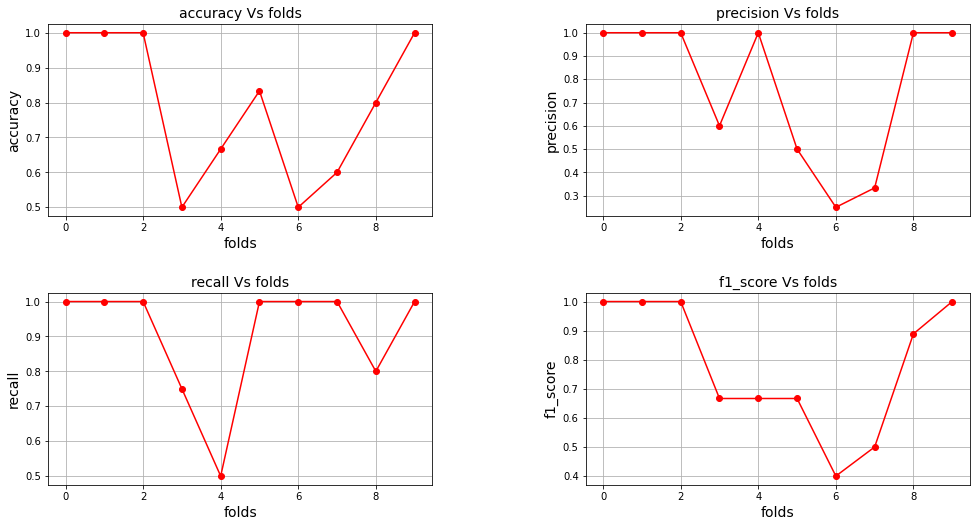

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(scaled_labour_train,rf1,sampling=None)



#  DT on labour data

Mean Accuracy for Random Forest Classifier:  0.6866666666666666
Mean precision for Random Forest Classifier:  0.725
Mean recall for Random Forest Classifier:  0.5933333333333333
Mean f1_score for Random Forest Classifier:  0.6290476190476191


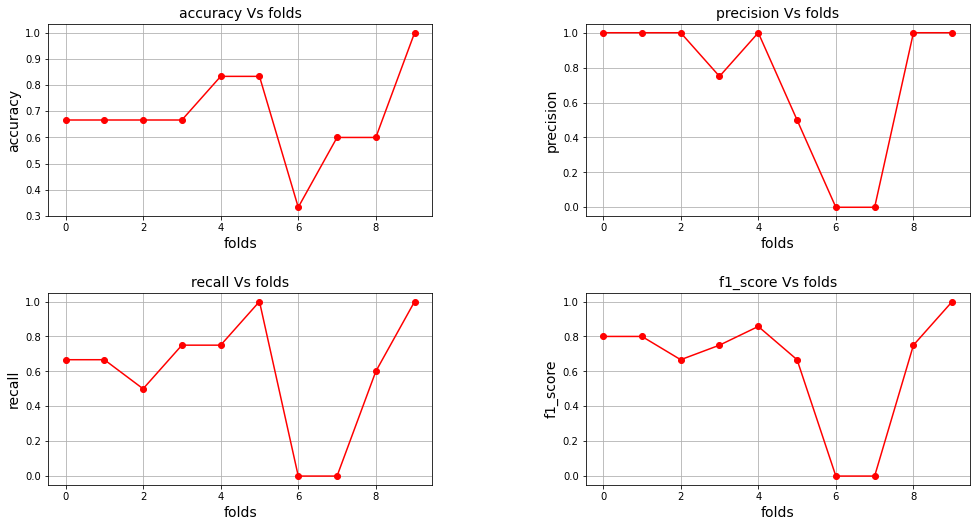

In [109]:
# Decision Tree on heart data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

rf1 = DecisionTreeClassifier()
K_Fold_With_Dataset(scaled_labour_train,rf1,sampling=None)



# SVC on labour data

Mean Accuracy for Random Forest Classifier:  0.6133333333333333
Mean precision for Random Forest Classifier:  0.6633333333333333
Mean recall for Random Forest Classifier:  0.9183333333333333
Mean f1_score for Random Forest Classifier:  0.6967027417027417


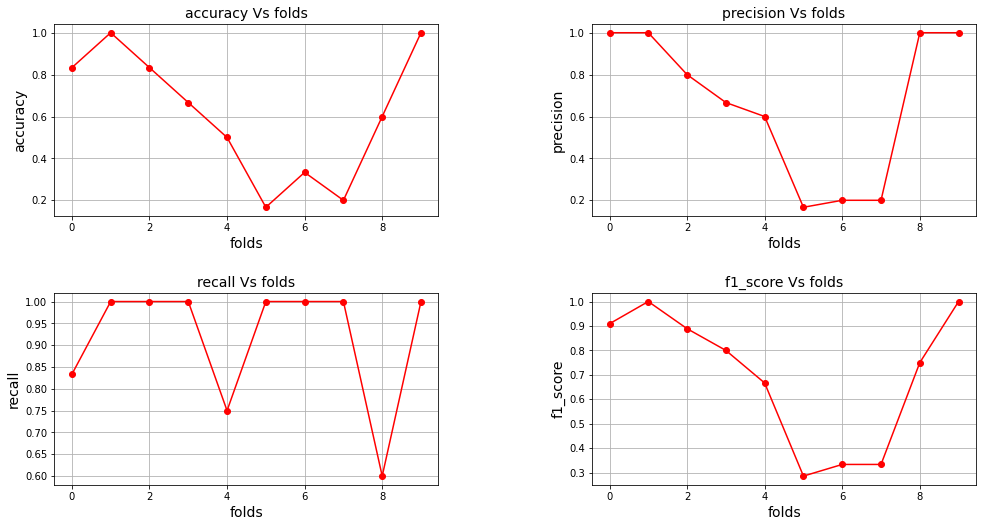

In [119]:
#  SVC on heart data

from sklearn.svm import SVC
from sklearn.metrics import f1_score

rf1 = SVC(kernel='rbf')
K_Fold_With_Dataset(heart_data_training,rf1,sampling=None)



# KNN on labour data

Mean Accuracy for Random Forest Classifier:  0.64
Mean precision for Random Forest Classifier:  0.7133333333333334
Mean recall for Random Forest Classifier:  0.8366666666666667
Mean f1_score for Random Forest Classifier:  0.6783333333333333


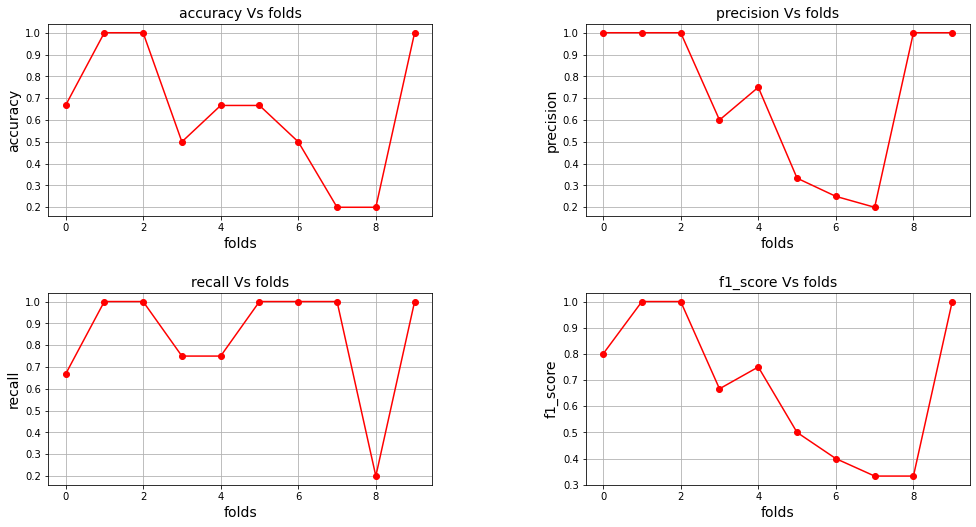

In [111]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

rf1 = KNeighborsClassifier(n_neighbors=9)
K_Fold_With_Dataset(scaled_labour_train,rf1,sampling=None)



#  MLP on labour data

Mean Accuracy for Random Forest Classifier:  0.7066666666666667
Mean precision for Random Forest Classifier:  0.6933333333333334
Mean recall for Random Forest Classifier:  0.6466666666666667
Mean f1_score for Random Forest Classifier:  0.6397546897546897


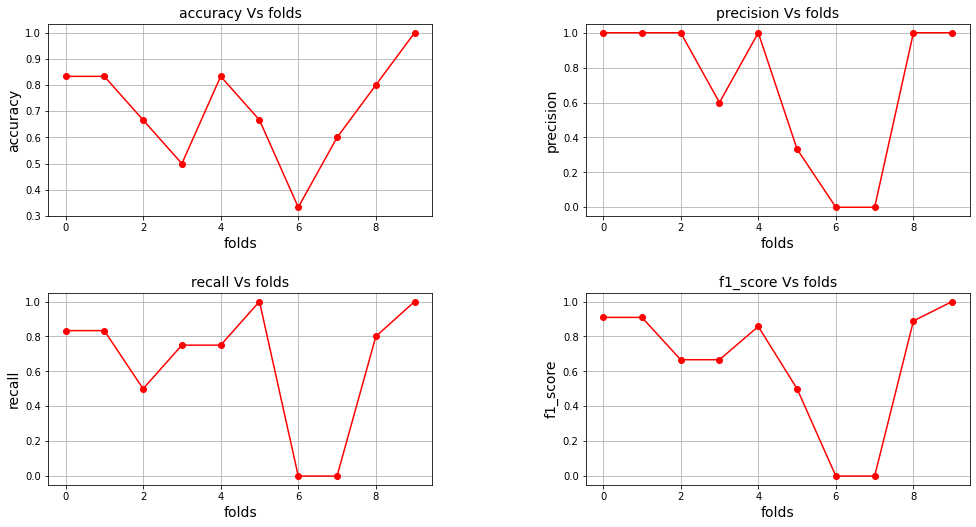

In [112]:


from sklearn.neural_network import MLPClassifier
rf1= MLPClassifier(hidden_layer_sizes=(200,300,50), max_iter=500,activation = 'relu',solver='adam',random_state=20)

K_Fold_With_Dataset(scaled_labour_train,rf1,sampling=None)



# GradientBoosting on labour data

Mean Accuracy for Random Forest Classifier:  0.77
Mean precision for Random Forest Classifier:  0.775
Mean recall for Random Forest Classifier:  0.9016666666666666
Mean f1_score for Random Forest Classifier:  0.7791991341991342


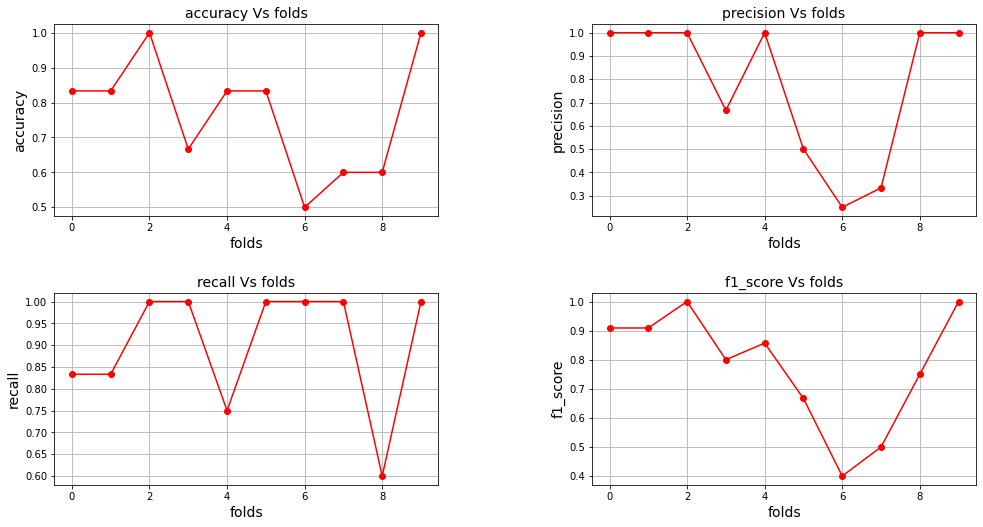

In [113]:


from sklearn.ensemble import GradientBoostingClassifier
rf1= GradientBoostingClassifier(n_estimators=100, learning_rate=0.005, random_state=42)
K_Fold_With_Dataset(scaled_labour_train,rf1, sampling='Oversample')

# Friedman Test

In [116]:
# Importing libraries
from scipy import stats
import scikit_posthocs as sp
import numpy as np


Dataset_D = [0.792077564,0.791013734,0.780949567,0.770857255,0.770325341,0.780946752]
DB1=[0.670674322,0.686507937,0.610728358,0.621822582,0.64785264,0.743296184]
DB2=[0.701415625,0.631388607,0.699811438,0.671710008,0.686522008,0.692387144]
Heart_Diease_Data=[0.784623656,0.735483871,0.820860215,0.560215054,0.56827957,0.807741935]
Labour_Data=[0.79,0.686666667,0.636666667,0.64,0.706666667,0.77]

 
# Conduct the Friedman Test
r = stats.friedmanchisquare(Dataset_D,DB1,DB2,Heart_Diease_Data,Labour_Data)
 

    

In [117]:
print(r)

FriedmanchisquareResult(statistic=12.133333333333326, pvalue=0.016386822493064904)


In [ ]:
F stat for k=6, n=5 : 10.49

In [120]:
# Combine three groups into one array
data = np.array([Dataset_D,DB1,DB2,Heart_Diease_Data,Labour_Data])
 
# Conduct the Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data.T)

0         1         2         3         4
0  1.000000  0.008987  0.078907  0.470742  0.470742
1  0.008987  1.000000  0.900000  0.470742  0.470742
2  0.078907  0.900000  1.000000  0.887271  0.887271
3  0.470742  0.470742  0.887271  1.000000  0.900000
4  0.470742  0.470742  0.887271  0.900000  1.000000

In [132]:
data = pd.read_csv('acc.csv')
data

Name        RF        DT       SVC       KNN       MLP  \
0          Dataset_D  0.792078  0.791014  0.780950  0.770857  0.770325   
1                DB1  0.670674  0.686508  0.610728  0.621823  0.647853   
2                DB2  0.701416  0.631389  0.699811  0.671710  0.686522   
3  Heart Diease Data  0.784624  0.735484  0.820860  0.560215  0.568280   
4        Labour Data  0.790000  0.686667  0.636667  0.640000  0.706667   

         GB  
0  0.780947  
1  0.743296  
2  0.692387  
3  0.807742  
4  0.770000

In [137]:
data.set_index(list(data)[0])

RF        DT       SVC       KNN       MLP        GB
Name                                                                         
Dataset_D          0.792078  0.791014  0.780950  0.770857  0.770325  0.780947
DB1                0.670674  0.686508  0.610728  0.621823  0.647853  0.743296
DB2                0.701416  0.631389  0.699811  0.671710  0.686522  0.692387
Heart Diease Data  0.784624  0.735484  0.820860  0.560215  0.568280  0.807742
Labour Data        0.790000  0.686667  0.636667  0.640000  0.706667  0.770000

In [146]:
rank_avg = data.rank(1,ascending=False,method="min")

In [147]:
rank_avg.mean()

RF     1.8
DT     3.6
SVC    3.6
KNN    5.2
MLP    4.4
GB     2.4
dtype: float64

In [144]:
import Orange


In [143]:
pip install orange3

  Using cached Orange3-3.33.0-cp39-cp39-win_amd64.whl (27.5 MB)
Note: you may need to restart the kernel to use updated packages.Collecting keyrings.alt
  Using cached keyrings.alt-4.2.0-py3-none-any.whl (20 kB)



  Using cached python_louvain-0.16-py3-none-any.whl
  Using cached httpx-0.23.0-py3-none-any.whl (84 kB)
  Using cached AnyQt-0.2.0-py3-none-any.whl (56 kB)
  Using cached pyqtgraph-0.13.1-py3-none-any.whl (966 kB)
  Using cached Bottleneck-1.3.5-cp39-cp39-win_amd64.whl (109 kB)
  Using cached serverfiles-0.3.1-py3-none-any.whl
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Using cached PyQtWebEngine-5.15.6-cp37-abi3-win_amd64.whl (182 kB)
  Using cached baycomp-1.0.2-py3-none-any.whl (17 kB)
  Using cached orange_canvas_core-0.1.28-py3-none-any.whl (497 kB)
  Using cached PyQt5-5.15.7-cp37-abi3-win_amd64.whl (6.8 MB)
  Using cached openTSNE-0.6.2-cp39-cp39-win_amd64.whl (387 kB)
  Using cached orange_widget_base-4.18.0-py3-none-any.whl (251 kB)
  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached keyring-23.11.0-py3-none-any.whl (36 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
  Using cached CacheControl-0.12.11-py2.py3-none-any.whl (21

cd =  3.3718164276595783


C:\Users\SnehalBhole\AppData\Local\Temp/ipykernel_32432/4159172373.py:9: OrangeDeprecationWarning: compute_CD is deprecated and will be removed in Orange 3.34.
  critical_diff = Orange.evaluation.compute_CD(rnk,5,alpha="0.05")
C:\Users\SnehalBhole\AppData\Local\Temp/ipykernel_32432/4159172373.py:11: OrangeDeprecationWarning: graph_ranks is deprecated and will be removed in Orange 3.34.
  Orange.evaluation.graph_ranks(rnk,l,cd=critical_diff,width=6,textspace=1.5)


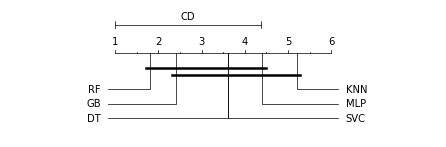

In [148]:
l=['RF','DT','SVC','KNN','MLP','GB']
rnk = [ 1.8,
  3.6,
  3.6,
  5.2,
  4.4,
  2.4
]
critical_diff = Orange.evaluation.compute_CD(rnk,5,alpha="0.05")
print("cd = ", critical_diff)
Orange.evaluation.graph_ranks(rnk,l,cd=critical_diff,width=6,textspace=1.5)

In [ ]:
'RF' = 1.8
'DT' = 3.6
'SVC'= 3.6
'KNN'= 5.2
'MLP'= 4.4
'GB' = 2.4

3.6-1.8 = 1.8
5.2 - 1.8 = 3.4
5.2 - 2.4 = 2.8